In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import os

ModuleNotFoundError: No module named 'xarray'

In [2]:
### calculate moving average
# define function for use of numpy arrays
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


### plotting routine
def plot_range(SampleData,ax1,col='steelblue',prctl=[5,25,50,75,95]):
 
 SDist=np.percentile(SampleData,prctl,axis=1).T

 x=np.arange(0,len(pd.DatetimeIndex(SampleData.time).year))
 #ax1.plot(x, SDist[:,2],)
 for i in range(int(np.floor(len(prctl)/2))+1):
     alph=0.15+(i/len(prctl))
     ax1.fill_between(x,SDist[:,0+i], SDist[:,len(prctl)-1-i], color=col, alpha=alph, edgecolor="none")
 return SDist

### plotting routine
def plot_bxp(SampleData,tim,j,ax1,col='steelblue',prctl=[5,25,50,75,95],linestyle='-',alpha=0.2,lbl=''):
    SDist=np.percentile(SampleData,prctl,axis=1).T
    for i in range(int(np.floor(len(prctl)/2))+1):
        ax1.vlines(tim,SDist[j,0+i], SDist[j,len(prctl)-1-i], color=col,linestyle=linestyle)
    
    ax1.plot(tim,SDist[j,int(np.floor(len(prctl)/2))], color=col, marker='o',label=lbl)

# Emission data

In [3]:
e_flat10=pd.read_csv('flat10.csv',header=4)
e_flat10_cdr=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_zec=pd.read_csv('flat10_zec.csv',header=4)

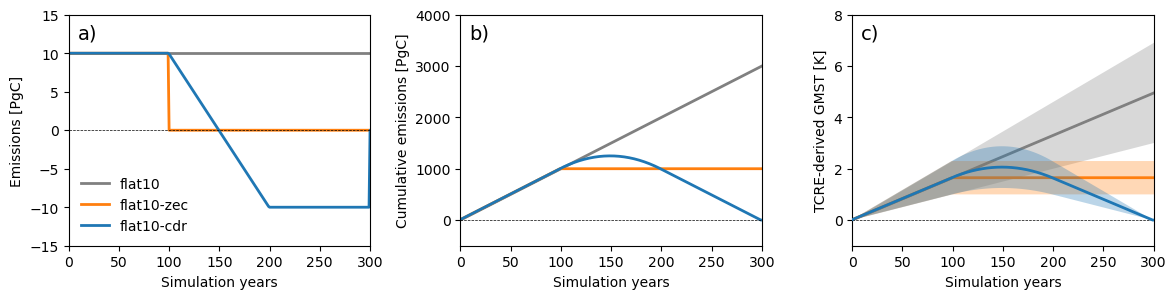

In [5]:
fig = plt.figure(figsize=(14,3))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)

sub.set_ylabel("Emissions [PgC]")
sub.set_xlabel("Simulation years")
sub.set_xlim(0,300)
sub.set_ylim(-15,15)
sub.plot(np.repeat(10,320), color='gray', lw=2, label="flat10")
sub.plot(np.array(e_flat10_zec)[:,1], color="tab:orange", lw=2, label="flat10-zec")
sub.plot(np.array(e_flat10_cdr)[:,1], color="tab:blue", lw=2, label="flat10-cdr")
sub.axhline(0, color="black", lw=0.5, linestyle="--")
sub.legend(frameon=False, loc="lower left")
sub.annotate('a)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 2
sub = fig.add_subplot(1, 3, 2)

sub.set_ylabel("Cumulative emissions [PgC]")
sub.set_xlabel("Simulation years")
sub.set_xlim(0,300)
sub.set_ylim(-500,4000)
sub.plot(np.arange(0,320)*10, color='grey', lw=2, zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1]), lw=2, color='tab:orange')
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1]), lw=2, color="tab:blue")
sub.axhline(0, color="black", lw=0.5, linestyle="--")
sub.annotate('b)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 3
# TCRE values/range from AR6 - 5.5.1.4
sub = fig.add_subplot(1, 3, 3)

sub.set_ylabel("TCRE-derived GMST [K]")
sub.set_xlabel("Simulation years")
sub.set_xlim(0,300)
sub.set_ylim(-1,8)
sub.plot(np.arange(0,320)*10*1.65/1000, color='grey', lw=2, zorder=1)
sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.3, edgecolor="none", zorder=1)
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=2, color='tab:orange', zorder=2)
sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="tab:orange", alpha=0.3, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=2, color="tab:blue", zorder=3)
sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="tab:blue", alpha=0.3, edgecolor="none", zorder=3)
sub.axhline(0, color="black", lw=0.5, linestyle="--")
sub.annotate('c)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

fig.subplots_adjust(wspace=0.3, hspace=0)

plt.savefig("images/flat10_exp_design.pdf", bbox_inches='tight')
plt.savefig("images/flat10_exp_design.jpg", bbox_inches='tight')


# SCM data

In [6]:
# import fair, magicc, CSCM

# FaIR
ds_fair = xr.open_dataset('SCM_data/timeseries/flat10_FaIR.nc')

# MAGICC
ds_magicc = xr.open_dataset('SCM_data/timeseries/flat10_magicc.nc')

ds_magicc=ds_magicc.rename_vars(name_dict={'Atmospheric_Concentrations__CO2':'co2_concentration'})
ds_magicc=ds_magicc.rename_vars(name_dict={'Surface_Air_Temperature_Change':'temperature'})
ds_magicc=ds_magicc.rename_dims(dims_dict={'ensemble_member':'config'})

ds_magicc["scenario"]=("scenario",['esm-flat10','esm-flat10_cdr','esm-flat10_zec'])

# CSCM
ds_cicero = xr.open_dataset('SCM_data/timeseries/flat10_CICEROSCM.nc')
ds_cicero["scenario"]=("scenario",['esm-flat10','esm-flat10_zec','esm-flat10_cdr','esm-piControl'])

Temperature per model

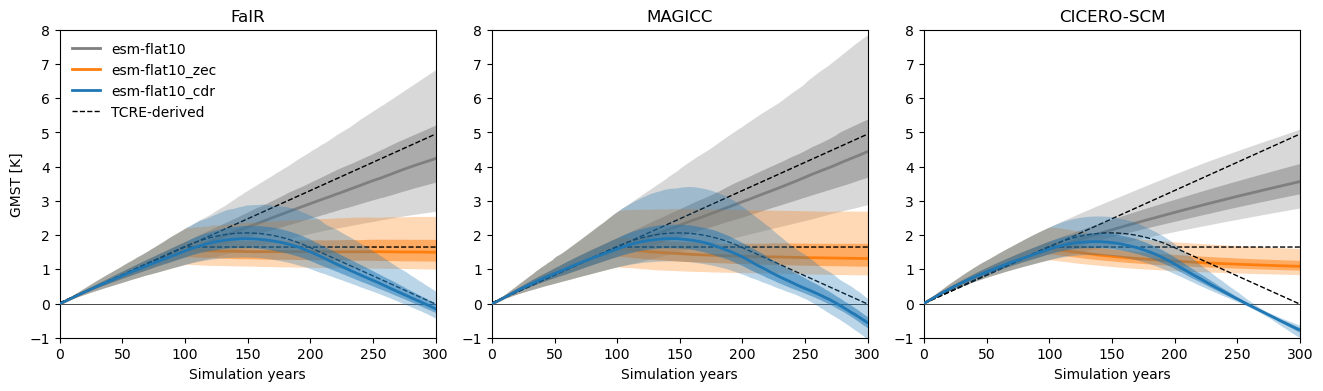

In [7]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("FaIR")
sub.set_ylabel("GMST [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,8)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, label="esm-flat10", zorder=1)

dd = ds_fair.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_fair.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, label="esm-flat10_cdr", zorder=3)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
#sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("MAGICC")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,8)
sub.set_xlim(0,300)

dd = ds_magicc.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,0),color="tab:gray",lw=2, zorder=1)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,0),color="tab:orange",lw=2, zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
#sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("CICERO-SCM")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,8)
sub.set_xlim(0,300)

dd = ds_cicero.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, zorder=1)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, zorder=3)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
#sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)

fig.subplots_adjust(wspace=0.15, hspace=0)

Temperature per scenario

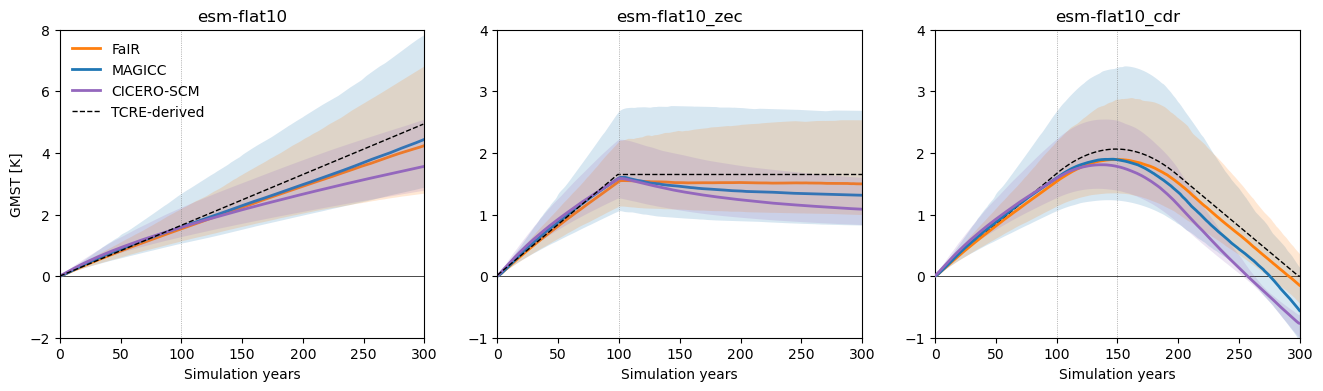

In [8]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("esm-flat10")
sub.set_ylabel("GMST [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-2,8)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="FaIR", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("esm-flat10_zec")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=2)

sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("esm-flat10_cdr")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_cdr", zorder=3)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=3)

sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")

Atmospheric CO2 per model

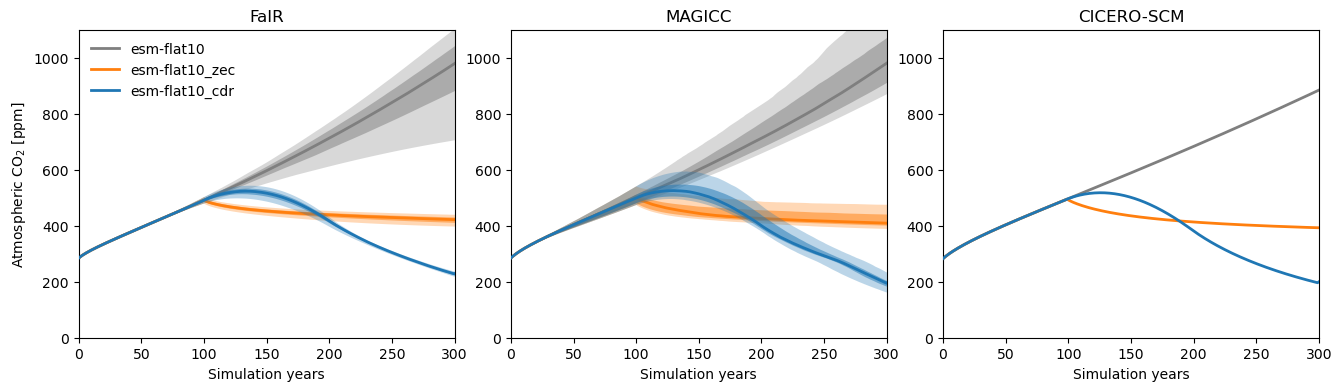

In [9]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("FaIR")
sub.set_ylabel("Atmospheric CO$_2$ [ppm]")
sub.set_xlabel("Simulation years")
sub.set_ylim(0,1100)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, label="esm-flat10", zorder=1)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, label="esm-flat10_cdr", zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("MAGICC")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(0,1100)
sub.set_xlim(0,300)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,0),color="tab:gray",lw=2, zorder=1)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,0),color="tab:orange",lw=2, zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("CICERO-SCM")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(0,1100)
sub.set_xlim(0,300)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, zorder=1)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)

fig.subplots_adjust(wspace=0.15, hspace=0)

Atmospheric CO2 per scenario

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/3676435420.py:6: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")


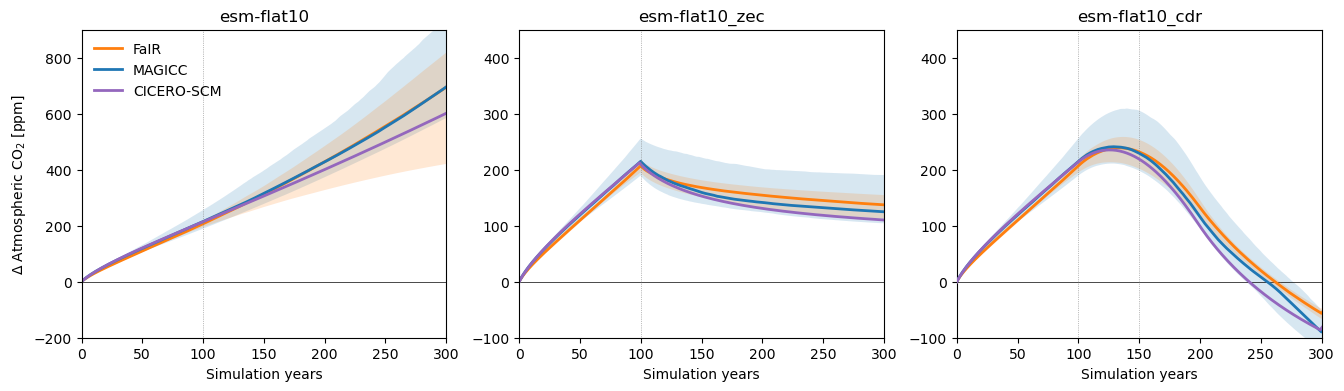

In [10]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("esm-flat10")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-200,900)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="FaIR", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("esm-flat10_zec")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("esm-flat10_cdr")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_cdr", zorder=3)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")

<>:94: SyntaxWarning: invalid escape sequence '\D'
<>:94: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/3391919273.py:94: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")


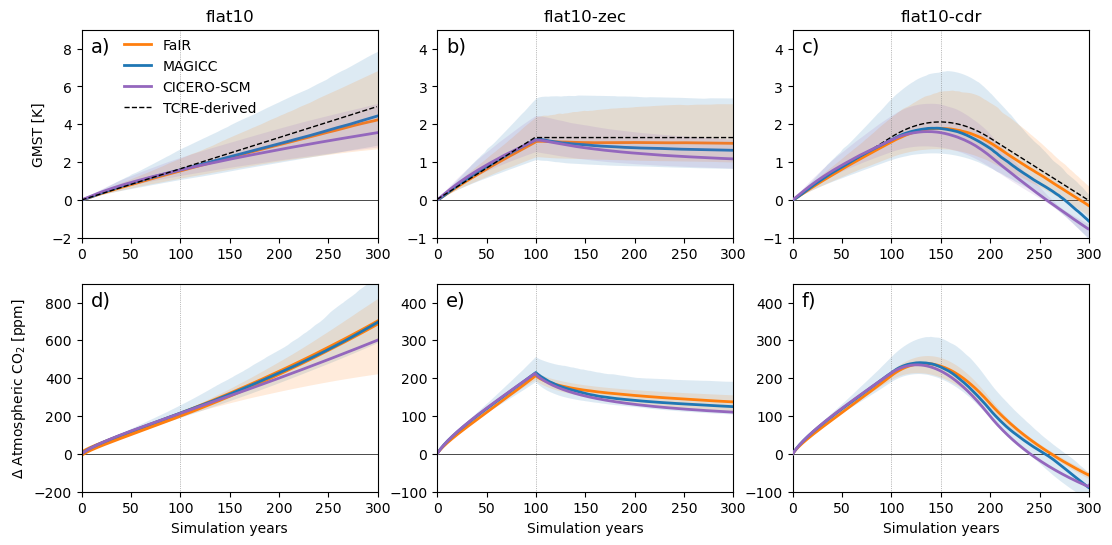

In [11]:
fig = plt.figure(figsize=(13,6))

# subfigure 1
sub = fig.add_subplot(2, 3, 1)
sub.set_title("flat10")
sub.set_ylabel("GMST [K]")
#sub.set_xlabel("Simulation years")
sub.set_ylim(-2,9)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="FaIR", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

sub.axhline(0, color="black", lw=0.5, zorder=0)
#sub.legend(frameon=False, loc="upper left", bbox_to_anchor=(0.005, 0.89))
sub.legend(frameon=False, loc="upper left", bbox_to_anchor=(0.1, 1.02))
sub.annotate('a)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 2
sub = fig.add_subplot(2, 3, 2)
sub.set_title("flat10-zec")
#sub.set_ylabel("Temperature [K]")
#sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4.5)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="flat10-zec", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=2)

sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.annotate('b)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 3
sub = fig.add_subplot(2, 3, 3)
sub.set_title("flat10-cdr")
#sub.set_ylabel("Temperature [K]")
#sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4.5)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="flat10_cdr", zorder=3)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=3)

sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")
sub.annotate('c)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 4
sub = fig.add_subplot(2, 3, 4)
#sub.set_title("esm-flat10")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-200,900)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=4, label="FaIR", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
#sub.legend(frameon=False, loc="upper left")
sub.annotate('d)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 5
sub = fig.add_subplot(2, 3, 5)
#sub.set_title("esm-flat10_zec")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.annotate('e)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 6
sub = fig.add_subplot(2, 3, 6)
#sub.set_title("esm-flat10_cdr")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_cdr", zorder=3)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")
sub.annotate('f)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

#plt.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.22)

plt.savefig("images/flat10_SCM_results_tas_co2_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_results_tas_co2_panel.jpg", bbox_inches='tight')

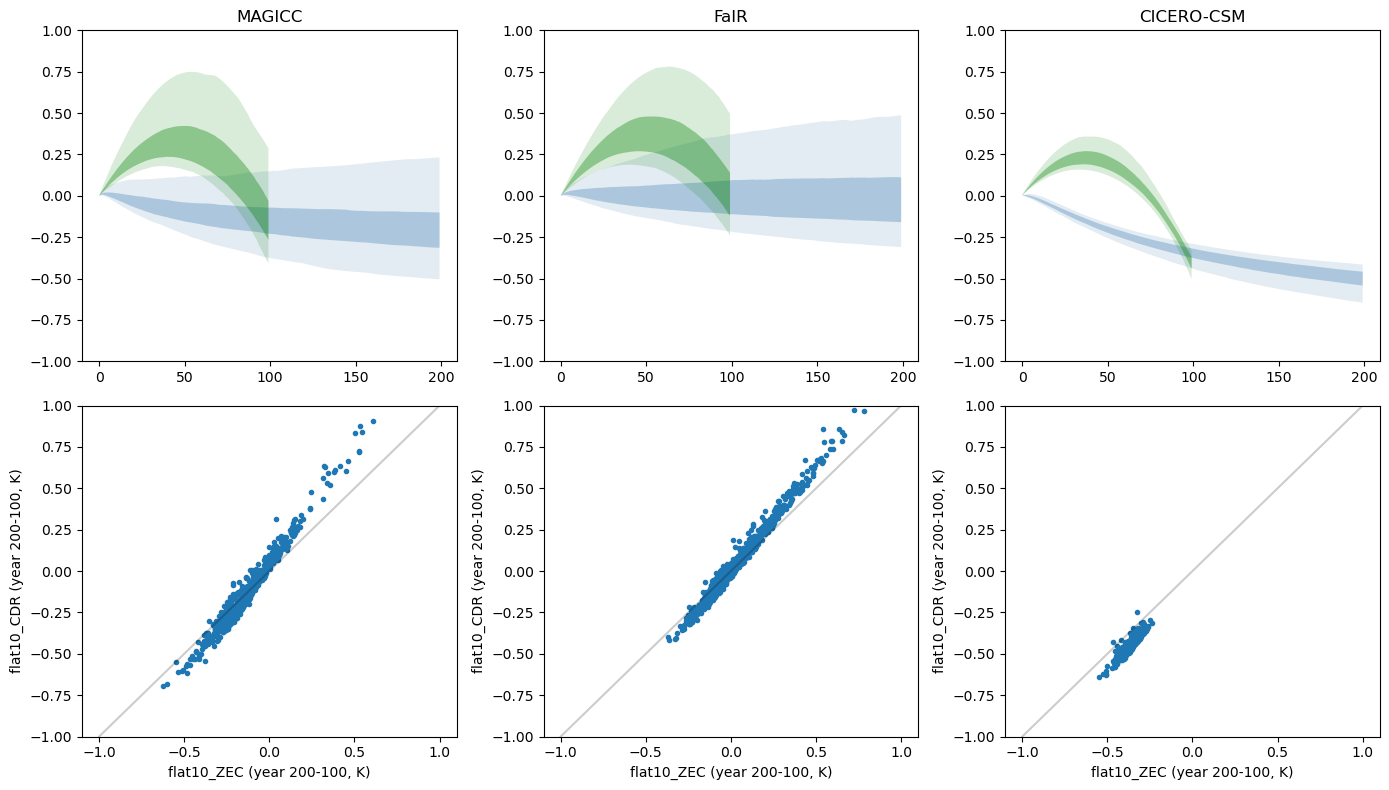

In [12]:
fig = plt.figure(figsize=[14,8])

m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100).T
m_100pl=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T
m_100plc=ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200)).T

ax1 = fig.add_subplot(2,3,1)
ax1.set_ylim([-1,1])
ax1.set_title('MAGICC')
plot_range(m_100pl-m_100,ax1)
plot_range(m_100plc-m_100,ax1,'g')

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
t_100pl=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
t_100plc=ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,2)
ax2.set_ylim([-1,1])
ax2.set_title('FaIR')

plot_range(t_100pl-t_100,ax2)
plot_range(t_100plc-t_100,ax2,'g')

c_100=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
c_100pl=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
c_100plc=ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,3)
ax2.set_ylim([-1,1])
ax2.set_title('CICERO-CSM')

plot_range(c_100pl-c_100,ax2)
plot_range(c_100plc-c_100,ax2,'g')

ax3 = fig.add_subplot(2,3,4)

ax3.plot(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-m_100,ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-m_100,'.')
ax3.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax3.set_xlabel('flat10_ZEC (year 200-100, K)')
ax3.set_ylabel('flat10_CDR (year 200-100, K)')
ax3.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,5)

ax4.plot(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-t_100,ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-t_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,6)

ax4.plot(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-c_100,ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-c_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])
plt.tight_layout()

# ESM data

In [13]:
def extd(ts,leng):
    out=np.zeros(leng)
    if leng>len(ts):
        out[:len(ts)]=ts.values
        out[len(ts):]=ts.iloc[-1]
    else:
        out=ts[:leng]
    return out

In [14]:
#mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','CNRM-ESM2-1','MPI-ESM1-2-LR']
mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','MPI-ESM1-2-LR']
expt=['esm-pictrl','1pctco2','flat10','flat10-zec','flat10-cdr']
flds=['tas','co2','nbp','fgco2']

In [15]:
%%capture

ed={}
for m in mdls:
    ed[m]={}
    for e in expt:
        tmpa=[]
        for f in flds:

                fl10='ESM_data/'+m+'/'+'flat10'+'_'+f+'_'+m+'.nc'
                fl='ESM_data/'+m+'/'+e+'_'+f+'_'+m+'.nc'
                if os.path.exists(fl) and os.path.exists(fl10):
                    otmp=xr.open_dataset(fl)
                    otmp10=xr.open_dataset(fl10)
                    if 'nep' in list(otmp.keys()):
                        otmp=otmp.rename_vars({"nep": "nbp"})
                    if 'nep' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"nep": "nbp"})
                    if 'CO2_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"CO2_GLOB": "co2"})
                        otmp=otmp.rename_vars({"CO2_GLOB": "co2"})
                    if 'NBP_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"NBP_GLOB": "nbp"})
                        otmp=otmp.rename_vars({"NBP_GLOB": "nbp"})
                    if 'FGCO2_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"FGCO2_GLOB": "fgco2"})
                        otmp=otmp.rename_vars({"FGCO2_GLOB": "fgco2"})    
                    if 'TIME' in list(otmp10.coords.keys()):                  
                        otmp10=otmp10.swap_dims({"TIME": "time"}).rename_vars({"TIME": "time"})
                    if 'TIME' in list(otmp.coords.keys()):                  
                        otmp=otmp.swap_dims({"TIME": "time"}).rename_vars({"TIME": "time"})
                    if 'TAS_GLOB' in list(otmp10.keys()):                  
                        otmp10=otmp10.rename_vars({"TAS_GLOB": "tas"})
                    if 'TAS_GLOB' in list(otmp.keys()):                  
                        otmp=otmp.rename_vars({"TAS_GLOB": "tas"})
                    if '__xarray_dataarray_variable__' in list(otmp10.keys()):                  
                        otmp10=otmp10.rename_vars({"__xarray_dataarray_variable__": f})
                    if '__xarray_dataarray_variable__' in list(otmp.keys()):                  
                        otmp=otmp.rename_vars({"__xarray_dataarray_variable__": f})

                    tmp=otmp.copy(deep=True)
                    tmp10=otmp10.copy(deep=True)
                    if e=='flat10':
                        if len(tmp.time)<1000:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='M')
                        tmp=tmp[f]    
                    else: 
                        if len(tmp.time)<1000:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='Y')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='M')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='M')
  
                        tmp=xr.concat((tmp10.where(tmp10['time.year'] < 1800, drop=True)[f],tmp[f]),'time')
                    tmp=tmp.groupby('time.year').mean()
                    if len(tmp.shape)==2:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lev')
                    if len(tmp.shape)==3:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lat').drop('lon')
                    if len(tmp.shape)==4:
                        if 'lev' in list(otmp10.coords.keys()):
                            tmp=tmp.sel(lat=0).sel(lon=0).isel(lev=[0]).drop('lat').drop('lon').drop('lev')
                        else:
                            tmp=tmp.sel(lat=0).sel(lon=0).isel(plev=[0]).drop('lat').drop('lon').drop('plev')
                    
                    if tmp.name=='tas':            
                        t10=tmp[0:20].mean().values
                        d10=tmp[20:40].mean().values-t10
                        t0=t10-d10/2
                        tmp=tmp-t0
                    tmpa.append(tmp)
                else:
                    print(m+e+f)
        
             
        ed[m][e]=xr.merge(tmpa)
        if len(tmpa)>0:
            ed[m][e]['fco2fos']=ed[m][e]['tas'].copy()
            if e=='flat10':
                    ed[m][e]['fco2fos'].values=extd(e_flat10['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-cdr':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-zec':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_zec['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if m=='ACCESS-ESM1-5':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6

            if m=='GFDL-ESM4':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                aco2=np.diff(ed[m][e]['co2'][:,0],prepend=ed[m][e]['co2'][0])*2.12
                ed[m][e]['fgco2']=ed[m][e]['fco2fos']-aco2-ed[m][e]['nbp']
            if m=='CESM2':
                ed[m][e]['fgco2']=ed[m][e]['fgco2']/1e15
                ed[m][e]['nbp']=ed[m][e]['nbp']/1e15
                
                ed[m][e]['co2']=280+np.cumsum(ed[m][e]['fco2fos']-ed[m][e]['fgco2']-ed[m][e]['nbp'])/2.12
            
                ed[m][e]['co2']=280+np.cumsum(ed[m][e]['fco2fos']-ed[m][e]['fgco2']-ed[m][e]['nbp'])/2.12
            if m=='NorESM2-LM':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                ed[m][e]['fgco2']=ed[m][e]['fgco2']*5.1e14/1e12*3600*24*365*.71

            if m=='CNRM-ESM2-1':
                ed[m][e]['nbp']=ed[m][e]['nbp']/1e2     

ed["GFDL-ESM4"]['flat10']['fgco2'][0] = ed["GFDL-ESM4"]['flat10']['fgco2'][0]-10        # correct first ocean value of GFDL-ESM4
ed["GFDL-ESM4"]['flat10-zec']['fgco2'][0] = ed["GFDL-ESM4"]['flat10-zec']['fgco2'][0]-10        # correct first ocean value of GFDL-ESM4
ed["GFDL-ESM4"]['flat10-cdr']['fgco2'][0] = ed["GFDL-ESM4"]['flat10-cdr']['fgco2'][0]-10        # correct first ocean value of GFDL-ESM4

for i,m in enumerate(mdls):
    print(m)
    try:
        ed[m]['flat10-cdr']['C_atm']=(ed[m]['flat10-cdr']['co2']-ed[m]['flat10']['co2'][0])*2.13
    except:
        print('fail cdr')
    try:
        ed[m]['flat10-zec']['C_atm']=(ed[m]['flat10-zec']['co2']-ed[m]['flat10']['co2'][0])*2.13
    except:
        print('fail zec')
    try:
        ed[m]['flat10']['C_atm']=(ed[m]['flat10']['co2']-ed[m]['flat10']['co2'][0])*2.13

    except:
        print('fail flat')    


Temperature per model

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/4018122038.py:10: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_ylabel("$\Delta$ Temperature [K]")


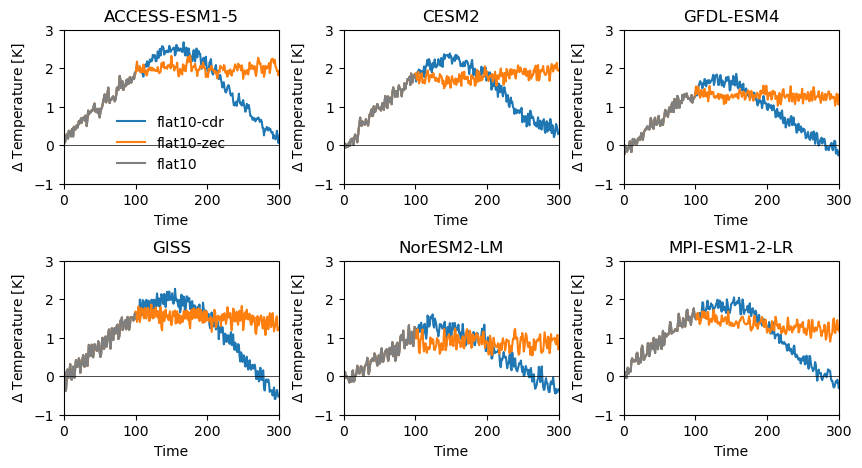

In [16]:
fig, axes = plt.subplots(2,3,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([-1,3])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("$\Delta$ Temperature [K]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['tas']-ed[m]['flat10']['tas'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['tas'][:100]-ed[m]['flat10']['tas'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
#axes[5].set_axis_off()
axes[0].legend(frameon=False)

fig.subplots_adjust(wspace=0.3, hspace=0.5)


Temperature per scenario

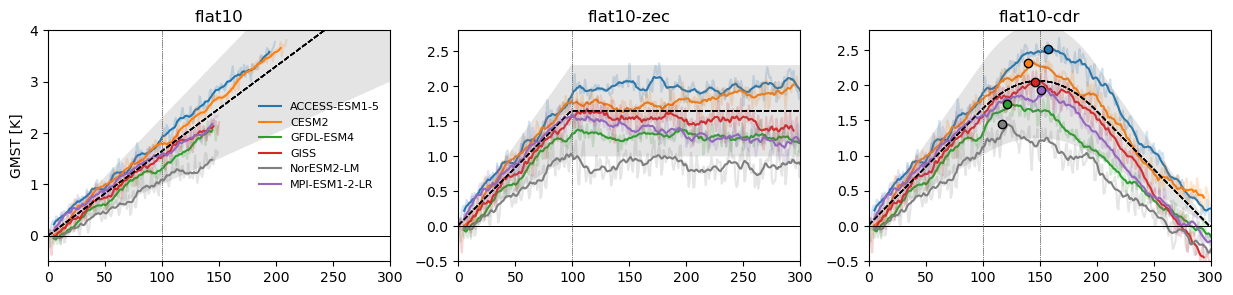

In [17]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['tas'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("GMST [K]")
    axes[0].set_ylim([-0.5,4])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['tas']-ed[mdls[i]]['flat10']['tas'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['tas']-ed[mdls[i]]['flat10']['tas'][0],window),color=colors[i],label=mdls[i])

    axes[0].plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--")
    axes[0].fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-0.5,2.8])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['tas']-ed[mdls[i]]['flat10-zec']['tas'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['tas']-ed[mdls[i]]['flat10-zec']['tas'][0],window),color=colors[i])

    axes[1].plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[1].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['tas'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-0.5,2.78])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0],window),color=colors[i])

    axes[2].plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[2].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0]),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


Atmospheric CO2 per model

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/2948594774.py:10: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_ylabel("$\Delta$ Atmospheric CO2 [ppm]")


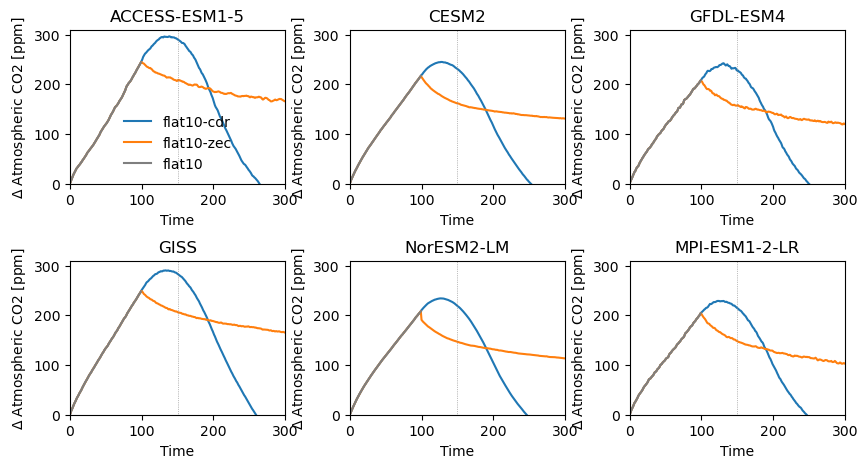

In [18]:
fig, axes = plt.subplots(2,3,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([0,310])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("$\Delta$ Atmospheric CO2 [ppm]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['co2']-ed[m]['flat10']['co2'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['co2']-ed[m]['flat10']['co2'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['co2'][:100]-ed[m]['flat10']['co2'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")
#axes[5].set_axis_off()
axes[0].legend(frameon=False)

fig.subplots_adjust(wspace=0.3, hspace=0.5)

Atmospheric CO2 per scenario

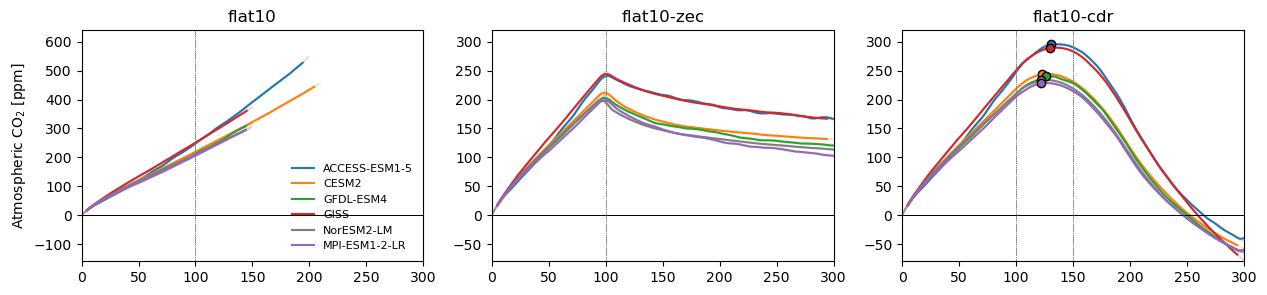

In [19]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['co2'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("Atmospheric CO$_2$ [ppm]")
    axes[0].set_ylim([-160,640])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0]),window),color=colors[i],label=mdls[i])

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['co2'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-80,320])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0]),window),color=colors[i])

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['co2'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-80,320])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


NBP per model

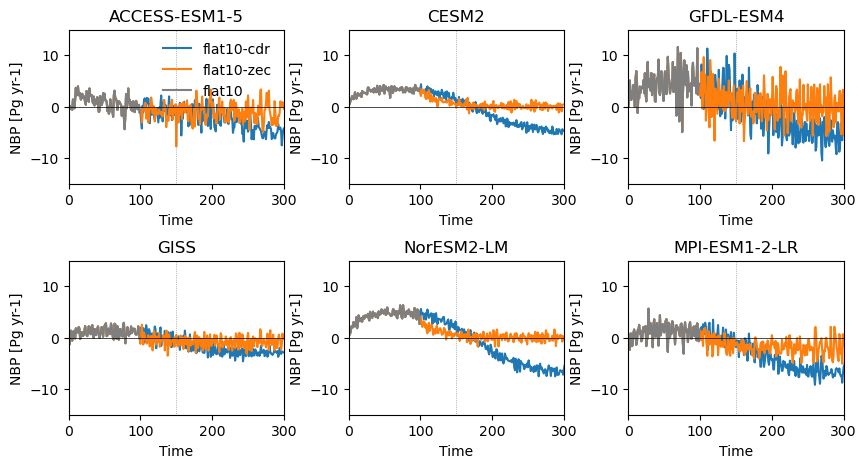

In [20]:
fig, axes = plt.subplots(2,3,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([-15,15])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("NBP [Pg yr-1]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['nbp']-ed[m]['flat10']['nbp'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['nbp']-ed[m]['flat10']['nbp'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['nbp'][:100]-ed[m]['flat10']['nbp'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")
#axes[5].set_axis_off()
axes[0].legend(frameon=False)

fig.subplots_adjust(wspace=0.3, hspace=0.5)

NBP per scenario

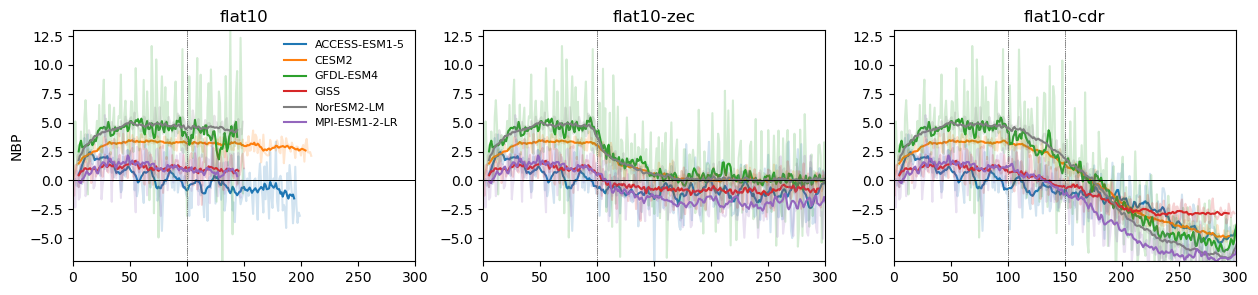

In [21]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("NBP")
    axes[0].set_ylim([-7,13])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0],window),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    axes[1].set_title("flat10-zec")
    #axes[1].set_ylabel("NBP")
    axes[1].set_ylim([-7,13])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0],window),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    #axes[2].set_ylabel("NBP")
    axes[2].set_ylim([-7,13])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0],window),color=colors[i])
    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


Cumulative NBP per scenario

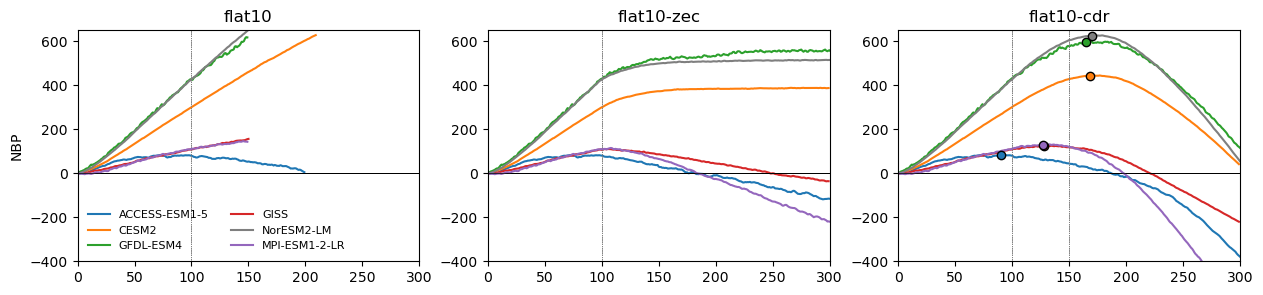

In [22]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("NBP")
    axes[0].set_ylim([-400,650])
    axes[0].set_xlim([0,300])
    axes[0].plot(np.cumsum(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0]),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8},ncol=2)

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-400,650])
    axes[1].set_xlim([0,300])
    axes[1].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0]),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-400,650])
    axes[2].set_xlim([0,300])
    axes[2].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


fgco2 per model

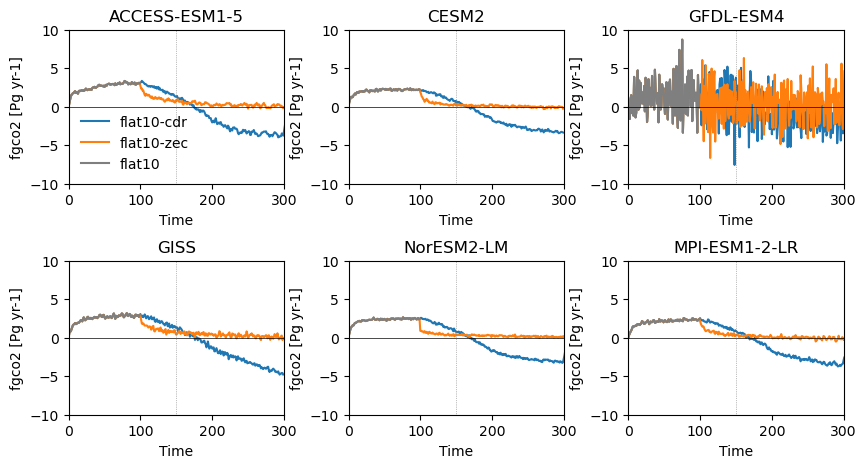

In [23]:
fig, axes = plt.subplots(2,3,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([-10,10])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("fgco2 [Pg yr-1]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['fgco2']-ed[m]['flat10']['fgco2'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['fgco2']-ed[m]['flat10']['fgco2'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['fgco2'][:100]-ed[m]['flat10']['fgco2'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")
#axes[5].set_axis_off()
axes[0].legend(frameon=False)

fig.subplots_adjust(wspace=0.3, hspace=0.5)

fgco2 per scenario

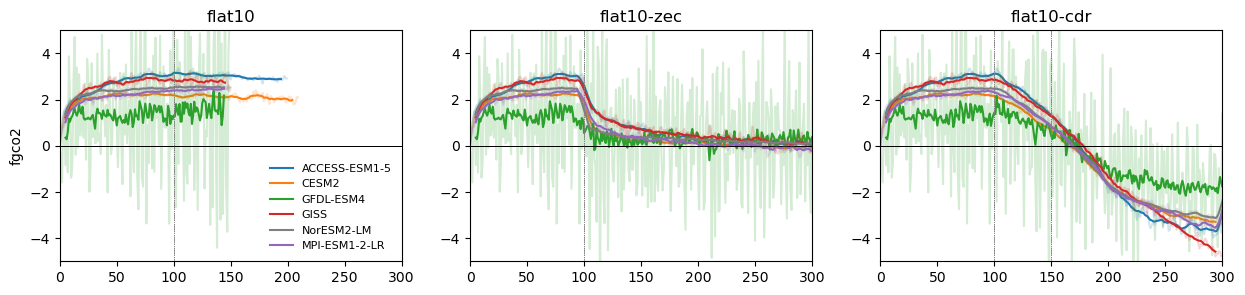

In [24]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("fgco2")
    axes[0].set_ylim([-5,5])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0],window),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    axes[1].set_title("flat10-zec")
    #axes[1].set_ylabel("NBP")
    axes[1].set_ylim([-5,5])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10-zec']['fgco2'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10-zec']['fgco2'][0],window),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    #axes[2].set_ylabel("NBP")
    axes[2].set_ylim([-5,5])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0],window),color=colors[i])
    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")

cumulative fgco2 per scenario

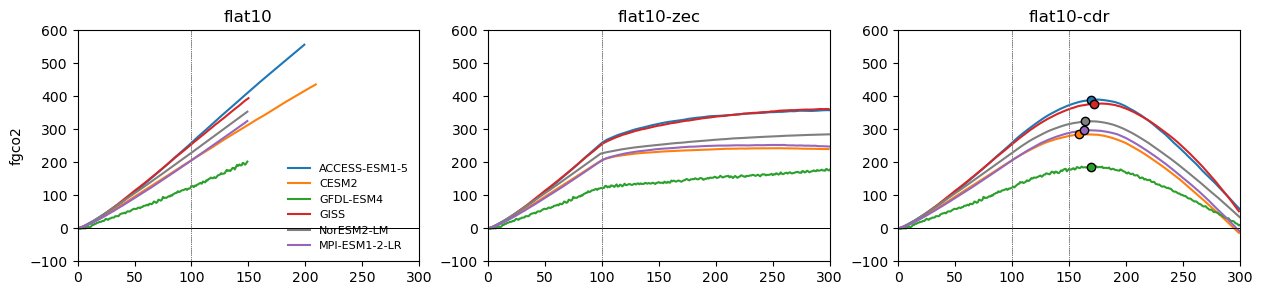

In [25]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("fgco2")
    axes[0].set_ylim([-100,600])
    axes[0].set_xlim([0,300])
    axes[0].plot(np.cumsum(ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0]),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-100,600])
    axes[1].set_xlim([0,300])
    axes[1].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10-zec']['fgco2'][0]),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-100,600])
    axes[2].set_xlim([0,300])
    axes[2].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0])),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")

Sink fractions

In [26]:
# extract absolute cumulative carbon balance (sinks) from components

# Atmosphere
dco2atm = np.zeros([3,len(mdls),300])
#dco2atm[0,:,150:] = np.nan
for i in np.arange(0,len(mdls)):
  dco2atm[0,i,1:150] = np.cumsum(np.squeeze(np.array(ed[mdls[i]]['flat10']['co2'][1:][0:149]))-np.squeeze(np.array(ed[mdls[i]]['flat10']['co2'][0:-1][0:149])))
  dco2atm[1,i,1:300] = np.cumsum(np.squeeze(np.array(ed[mdls[i]]['flat10-zec']['co2'][1:][0:299]))-np.squeeze(np.array(ed[mdls[i]]['flat10-zec']['co2'][0:-1][0:299])))
  dco2atm[2,i,1:300] = np.cumsum(np.squeeze(np.array(ed[mdls[i]]['flat10-cdr']['co2'][1:][0:299]))-np.squeeze(np.array(ed[mdls[i]]['flat10-cdr']['co2'][0:-1][0:299])))

# Land
dcUPlnd = np.zeros([3,len(mdls),300])
#dcUPlnd[0,:,150:] = np.nan
for i in np.arange(0,len(mdls)):
  dcUPlnd[0,i,0:150] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0])[0:150])))
  dcUPlnd[1,i,0:300] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10']['nbp'][0])[0:300])))
  dcUPlnd[2,i,0:300] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10']['nbp'][0])[0:300])))

# Ocean
dcUPocn = np.zeros([3,len(mdls),300])
#dcUPocn[0,:,150:] = np.nan
for i in np.arange(0,len(mdls)):
  dcUPocn[0,i,0:150] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0])[0:150])))
  dcUPocn[1,i,0:300] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0])[0:300])))
  dcUPocn[2,i,0:300] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0])[0:300])))
  

Sink fractions per model

<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/940623472.py:24: SyntaxWarning: invalid escape sequence '\D'
  axes[0].set_ylabel("$\Delta$ cum. carbon sink")
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/940623472.py:25: SyntaxWarning: invalid escape sequence '\D'
  axes[3].set_ylabel("$\Delta$ cum. carbon sink")


Text(0, 0.5, '$\\Delta$ cum. carbon sink')

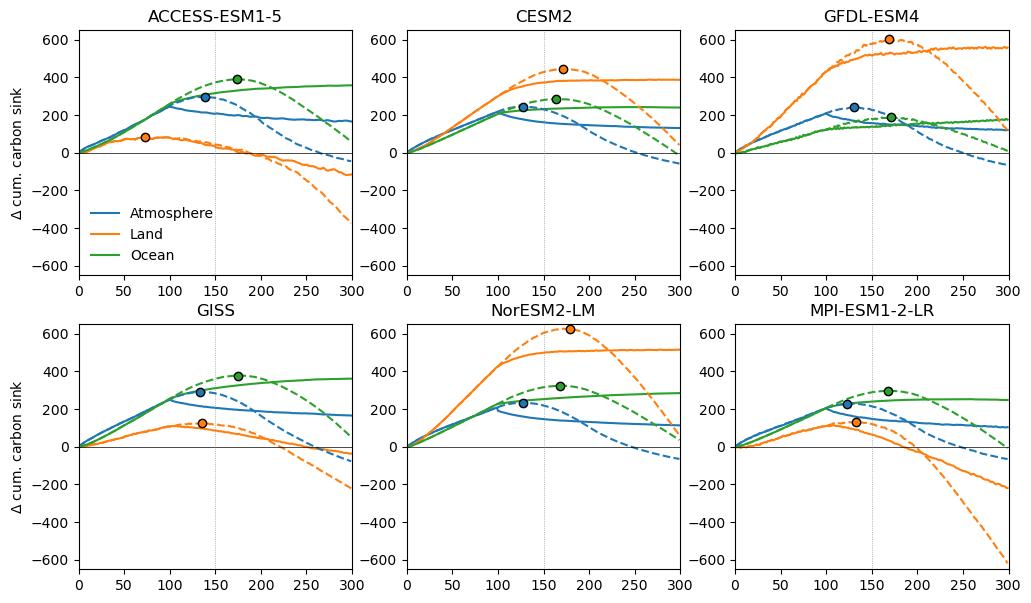

In [27]:
# cumulative carbon sinks for components and flat-zec (solid) and flat-cdr (dashed)

fig, axes = plt.subplots(2,3,figsize=(12, 7))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_title(m)
    axes[i].set_ylim(-650,650)
    axes[i].set_xlim(0,300)
    axes[i].plot(dco2atm[1,i,:],color="tab:blue",label='Atmosphere')
    axes[i].plot(dcUPlnd[1,i,:],color="tab:orange",label='Land')
    axes[i].plot(dcUPocn[1,i,:],color="tab:green",label='Ocean')
    axes[i].plot(dco2atm[2,i,:],color="tab:blue",linestyle="--")
    axes[i].plot(dcUPlnd[2,i,:],color="tab:orange",linestyle="--")
    axes[i].plot(dcUPocn[2,i,:],color="tab:green",linestyle="--")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")

    axes[i].scatter(np.where(dco2atm[2,i,:]==np.max(dco2atm[2,i,:]))[0], np.max(dco2atm[2,i,:]), color="tab:blue", edgecolor="black", zorder=4)
    axes[i].scatter(np.where(dcUPlnd[2,i,:]==np.max(dcUPlnd[2,i,:]))[0], np.max(dcUPlnd[2,i,:]), color="tab:orange", edgecolor="black", zorder=4)
    axes[i].scatter(np.where(dcUPocn[2,i,:]==np.max(dcUPocn[2,i,:]))[0], np.max(dcUPocn[2,i,:]), color="tab:green", edgecolor="black", zorder=4)

axes[0].legend(frameon=False)
axes[0].set_ylabel("$\Delta$ cum. carbon sink")
axes[3].set_ylabel("$\Delta$ cum. carbon sink")

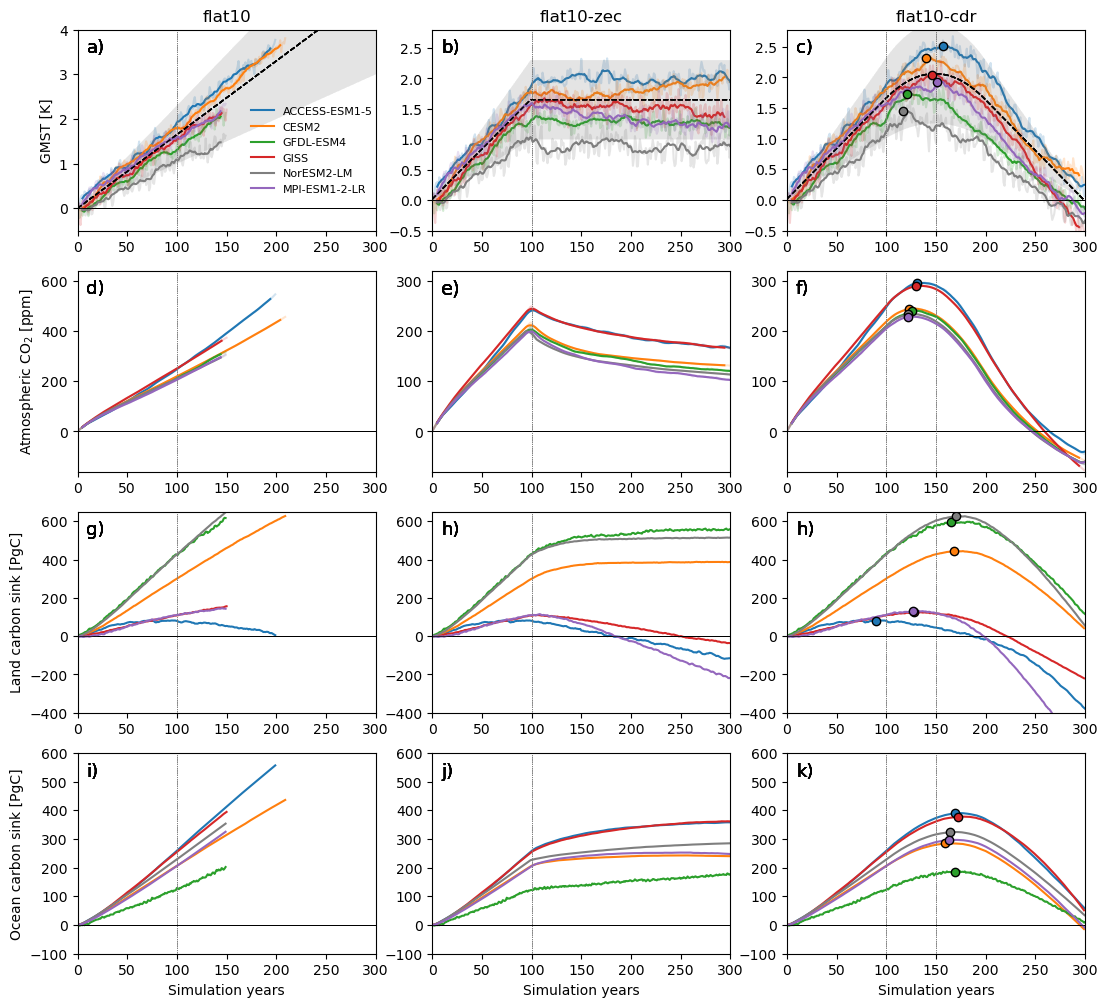

In [28]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axes = plt.subplots(4,3,figsize=(13, 12))
axes=axes.flatten()

### Temperature
for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['tas'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("GMST [K]")
    axes[0].set_ylim([-0.5,4])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['tas']-ed[mdls[i]]['flat10']['tas'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['tas']-ed[mdls[i]]['flat10']['tas'][0],window),color=colors[i],label=mdls[i])

    axes[0].plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--")
    axes[0].fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8}, bbox_to_anchor=(0.55, 0.4))
    axes[0].annotate('a)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-0.5,2.8])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['tas']-ed[mdls[i]]['flat10-zec']['tas'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['tas']-ed[mdls[i]]['flat10-zec']['tas'][0],window),color=colors[i])

    axes[1].plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[1].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[1].annotate('b)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['tas'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-0.5,2.78])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0],window),color=colors[i])

    axes[2].plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[2].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0]),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[2].annotate('c)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Atmospheric CO2
for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['co2'])-int(window/2))

    #axes[3].set_title("flat10")
    axes[3].set_ylabel("Atmospheric CO$_2$ [ppm]")
    axes[3].set_ylim([-160,640])
    axes[3].set_xlim([0,300])
    axes[3].plot(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0],alpha=0.2,color=colors[i])
    axes[3].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0]),window),color=colors[i],label=mdls[i])

    axes[3].axhline(0,lw=0.5,color="black")
    axes[3].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[3].legend(frameon=False, prop={'size': 8})
    axes[3].annotate('d)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['co2'])-int(window/2))

    #axes[4].set_title("flat10-zec")
    axes[4].set_ylim([-80,320])
    axes[4].set_xlim([0,300])
    axes[4].plot(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0],alpha=0.2,color=colors[i])
    axes[4].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0]),window),color=colors[i])

    axes[4].axhline(0,lw=0.5,color="black")
    axes[4].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[4].annotate('e)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=14, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['co2'])-int(window/2))

    #axes[5].set_title("flat10-cdr")
    axes[5].set_ylim([-80,320])
    axes[5].set_xlim([0,300])
    axes[5].plot(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0],alpha=0.2,color=colors[i])
    axes[5].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window)==mxy)[0]
    axes[5].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[5].axhline(0,lw=0.5,color="black")
    axes[5].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[5].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[5].annotate('f)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Land carbon
for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    #axes[6].set_title("flat10")
    axes[6].set_ylabel("Land carbon sink [PgC]")
    axes[6].set_ylim([-400,650])
    axes[6].set_xlim([0,300])
    axes[6].plot(np.cumsum(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0]),color=colors[i],label=mdls[i])
    axes[6].axhline(0,lw=0.5,color="black")
    axes[6].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[6].legend(frameon=False, prop={'size': 8},ncol=2)
    axes[6].annotate('g)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    #axes[7].set_title("flat10-zec")
    axes[7].set_ylim([-400,650])
    axes[7].set_xlim([0,300])
    axes[7].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0]),color=colors[i])
    axes[7].axhline(0,lw=0.5,color="black")
    axes[7].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[7].annotate('h)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    #axes[8].set_title("flat10-cdr")
    axes[8].set_ylim([-400,650])
    axes[8].set_xlim([0,300])
    axes[8].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window)==mxy)[0]
    axes[8].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[8].axhline(0,lw=0.5,color="black")
    axes[8].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[8].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[8].annotate('h)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Ocean carbon
for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    #axes[9].set_title("flat10")
    axes[9].set_xlabel("Simulation years")
    axes[9].set_ylabel("Ocean carbon sink [PgC]")
    axes[9].set_ylim([-100,600])
    axes[9].set_xlim([0,300])
    axes[9].plot(np.cumsum(ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0]),color=colors[i],label=mdls[i])
    axes[9].axhline(0,lw=0.5,color="black")
    axes[9].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[9].legend(frameon=False, prop={'size': 8})
    axes[9].annotate('i)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    #axes[10].set_title("flat10-zec")
    axes[10].set_xlabel("Simulation years")
    axes[10].set_ylim([-100,600])
    axes[10].set_xlim([0,300])
    axes[10].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10-zec']['fgco2'][0]),color=colors[i])
    axes[10].axhline(0,lw=0.5,color="black")
    axes[10].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[10].annotate('j)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    window = 11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    #axes[11].set_title("flat10-cdr")
    axes[11].set_xlabel("Simulation years")
    axes[11].set_ylim([-100,600])
    axes[11].set_xlim([0,300])
    axes[11].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0])),window)==mxy)[0]
    axes[11].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[11].axhline(0,lw=0.5,color="black")
    axes[11].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[11].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[11].annotate('k)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

fig.subplots_adjust(wspace=0.19, hspace=0.2)
plt.savefig("images/flat10_ESM_results_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_panel.jpg", bbox_inches='tight')


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
MPI-ESM1-2-LR


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


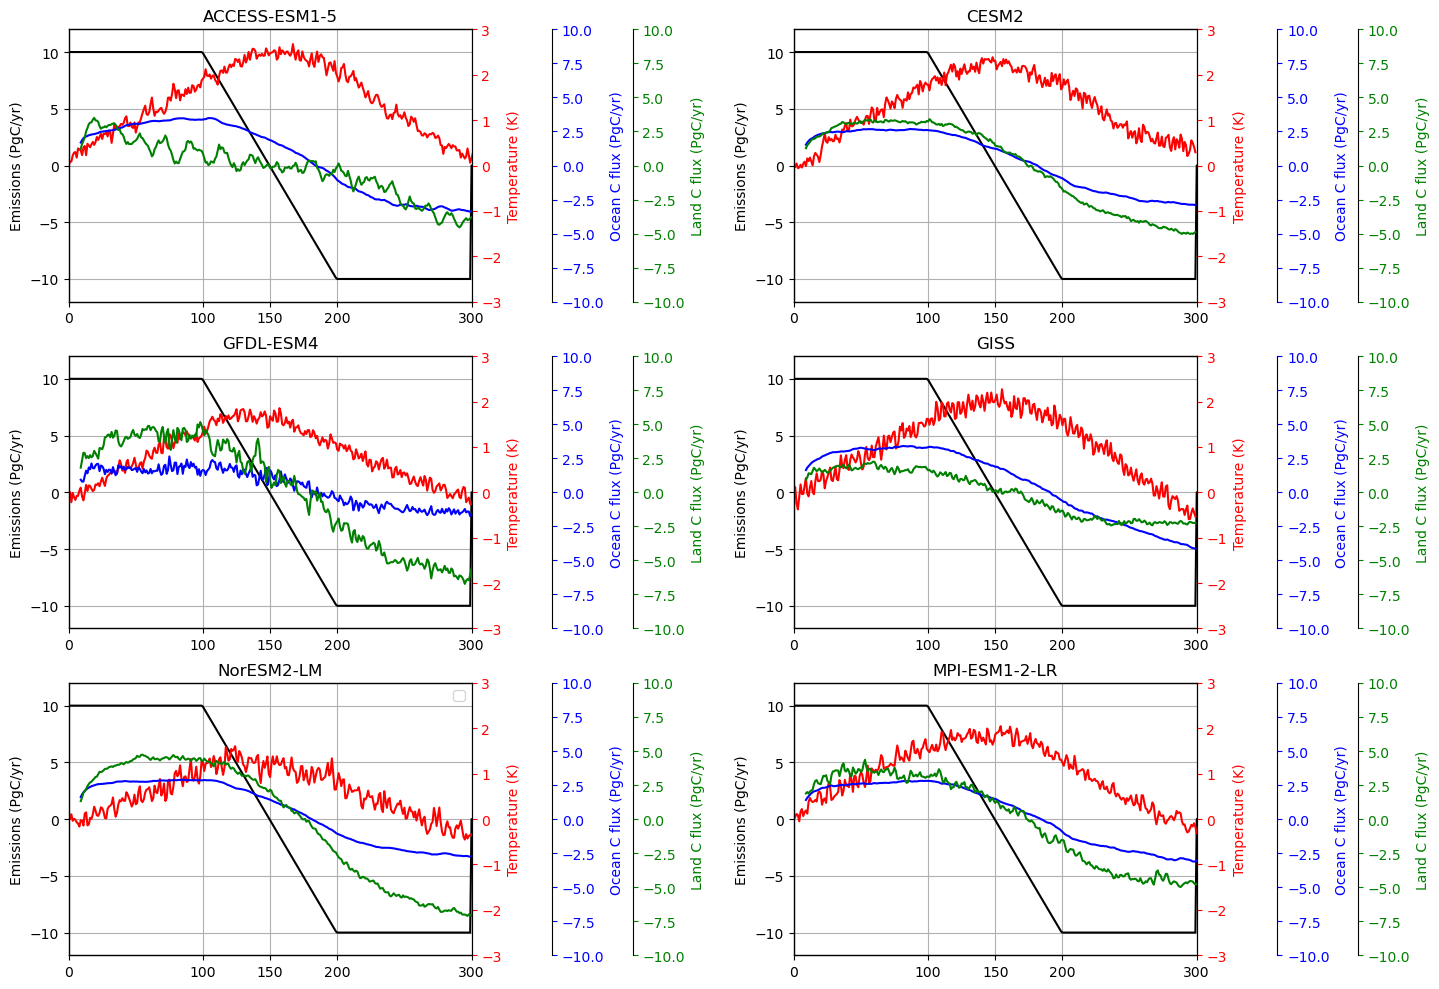

In [29]:
fig, axs = plt.subplots(3, 2,figsize=[15,10])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    twin1 = axs[i].twinx()
    twin2 = axs[i].twinx()
    twin3 = axs[i].twinx()
    
    twin2.spines.right.set_position(("axes", 1.2))
    twin3.spines.right.set_position(("axes", 1.4))
    
    axs[i].plot(np.arange(1700,2020),e_flat10_cdr['Emission Rate (PgC a-1)'],'k')

    try:
        (ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='red',ax=twin1,label='flat10')
    except:
        print('fail cdr')
    
    try:
        (ed[m]['flat10-cdr']['fgco2']).rolling(year=10).mean().plot(color='blue',ax=twin2,label='flat10')

    except:
        print(0)
    try:
        
        (ed[m]['flat10-cdr']['nbp']).rolling(year=10).mean().plot(color='green',ax=twin3,label='flat10')

    except:
        print(0)        
    twin1.set_title('')
    twin2.set_title('')
    twin3.set_title('')
    
    twin1.set_ylim([-3,3])
    twin2.set_ylim([-10,10])
    twin3.set_ylim([-10,10])
    axs[i].set_ylabel('Emissions (PgC/yr)')
    twin1.set_ylabel('Temperature (K)')
    twin2.set_ylabel('Ocean C flux (PgC/yr)')
    twin3.set_ylabel('Land C flux (PgC/yr)')    
    twin1.tick_params(axis='y', colors='red')
    twin1.yaxis.label.set_color('red')
    twin2.tick_params(axis='y', colors='blue')
    twin2.yaxis.label.set_color('blue')
    twin3.tick_params(axis='y', colors='green')
    twin3.yaxis.label.set_color('green')        
    axs[i].set_title(m)
    axs[i].set_ylim([-12,12])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1850,1900,2000])
    axs[i].set_xticklabels([0,100,150,200,300])
    axs[i].grid()
#axs[6].set_axis_off()
#axs[7].set_axis_off()
plt.tight_layout()
axs[4].legend()

fig.subplots_adjust(wspace=0.8, hspace=0.2)

ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
MPI-ESM1-2-LR


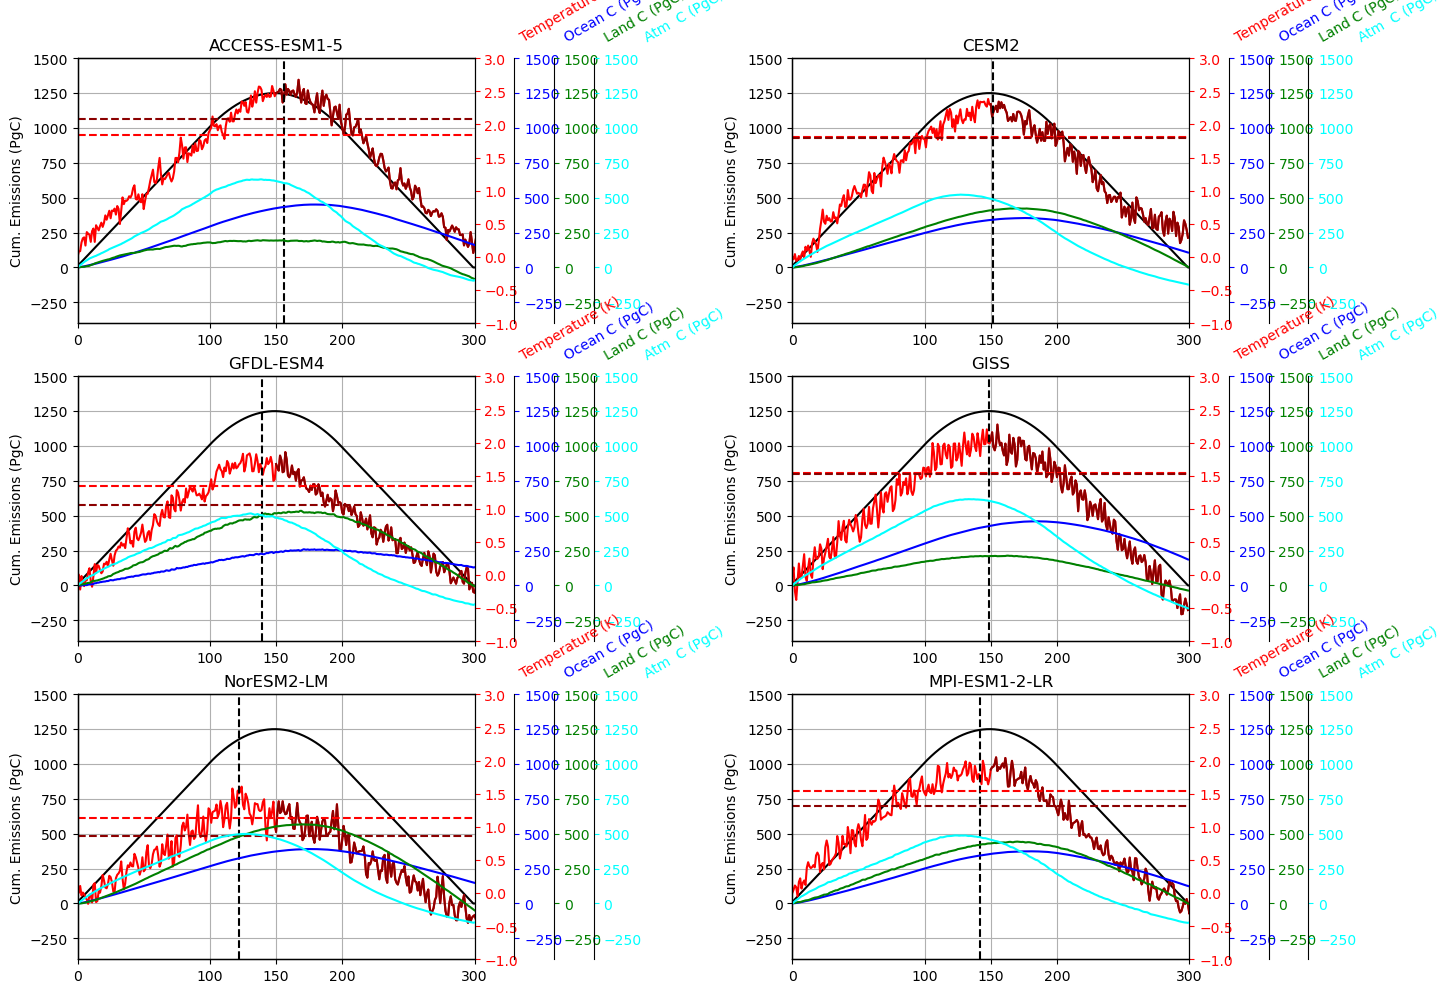

In [30]:
fig, axs = plt.subplots(3, 2,figsize=[15,10])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    twin1 = axs[i].twinx()
    twin2 = axs[i].twinx()
    twin3 = axs[i].twinx()
    twin4 = axs[i].twinx()
    
    twin2.spines.right.set_position(("axes", 1.1))
    twin3.spines.right.set_position(("axes", 1.2))
    twin4.spines.right.set_position(("axes", 1.3))
    
    
    axs[i].plot(np.arange(1700,2020),np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)']),'k')

    try:
        p1=(ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='red',ax=twin1,label='flat10')
        p2=(ed[m]['flat10-cdr']['tas'][150:]-ed[m]['flat10']['tas'][0]).plot(color='darkred',ax=twin1,label='flat10')
        
        mxy=ed[m]['flat10-cdr']['tas'].rolling(year=40, center=True).mean().idxmax()
        t100=ed[m]['flat10-cdr']['tas'][90:110].mean()
        t200=ed[m]['flat10-cdr']['tas'][190:210].mean()
        
        p3=twin1.axvline(mxy,color='k',linestyle='--')
        p4=twin1.axhline(t100-ed[m]['flat10']['tas'][0],color='r',linestyle='--')
        p5=twin1.axhline(t200-ed[m]['flat10']['tas'][0],color='darkred',linestyle='--')
        
        
    except:
        print('fail cdr')
    
    try:
        (ed[m]['flat10-cdr']['fgco2']).cumsum().plot(color='blue',ax=twin2,label='flat10')

    except:
        print(0)
    try:
        
        (ed[m]['flat10-cdr']['nbp']).cumsum().plot(color='green',ax=twin3,label='flat10')

    except:
        print(0)        
    try:
        
        (ed[m]['flat10-cdr']['C_atm']).plot(color='cyan',ax=twin4,label='flat10')

    except:
        print(0)          
    twin1.set_title('')
    twin2.set_title('')
    twin3.set_title('')
    twin4.set_title('')
    
    twin1.set_ylim([-1,3])
    twin2.set_ylim([-400,1500])
    twin3.set_ylim([-400,1500])
    twin4.set_ylim([-400,1500])
    
    axs[i].set_ylabel('Cum. Emissions (PgC)')
    twin1.set_ylabel('Temperature (K)', ha='left', y=1.1, rotation=30, labelpad=0)
    twin2.set_ylabel('Ocean C (PgC)', ha='left', y=1.1, rotation=30, labelpad=0)
    twin3.set_ylabel('Land C (PgC)', ha='left', y=1.1, rotation=30, labelpad=0)    
    twin4.set_ylabel('Atm  C (PgC)', ha='left', y=1.1, rotation=30, labelpad=0)    
    
    twin1.tick_params(axis='y', colors='red')
    twin1.yaxis.label.set_color('red')
    twin2.tick_params(axis='y', colors='blue')
    twin2.yaxis.label.set_color('blue')
    twin3.tick_params(axis='y', colors='green')
    twin3.yaxis.label.set_color('green')       
    twin4.tick_params(axis='y', colors='cyan')
    twin4.yaxis.label.set_color('cyan')  
    axs[i].set_title(m)
    axs[i].set_ylim([-400,1500])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1850,1900,2000])
    axs[i].set_xticklabels([0,100,150,200,300])
    axs[i].grid()
#axs[6].set_axis_off()
#axs[7].set_axis_off()
plt.tight_layout()

#lg=plt.legend([p1[0],p2[0],p3,p4,p5],['flat10','flat10 (post 150)','max temp','temp 100','temp 200'],bbox_to_anchor=(0.5, -.7))

fig.subplots_adjust(wspace=0.8, hspace=0.2)

Hysteresis plots

<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/1436936179.py:35: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ concentration [ppm]")


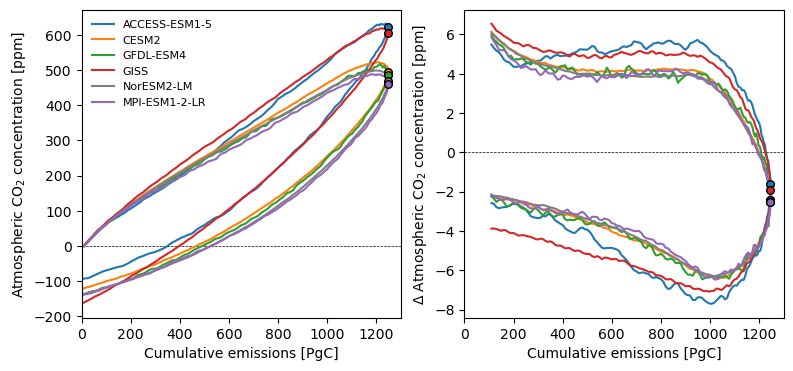

In [31]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]
window=21

fig = plt.figure(figsize=(14,4))

sub = fig.add_subplot(1, 3, 1)

sub.set_xlim(0,1300)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("Atmospheric CO$_2$ concentration [ppm]")
# ESMs
for i in np.arange(0,len(mdls)):
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], ed[mdls[i]]['flat10-cdr']['C_atm'][0:300], color=colors[i], label=mdls[i])
    sub.scatter(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[149], ed[mdls[i]]['flat10-cdr']['C_atm'][149], color=colors[i], s=30, edgecolor="black", zorder=4)
# SCMs
#sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0:300]-np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0])
#sub.fill_between(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300],
#                 np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0:300]-np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0],
#                 np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0:300]-np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0], alpha=0.3)
#sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),50,0)[0:300]-np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),50,0)[0])
#sub.fill_between(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300],
#                 np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),5,0)[0:300]-np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),5,0)[0],
#                 np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),95,0)[0:300]-np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),95,0)[0], alpha=0.3)
#sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0:300]-np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0])
#sub.fill_between(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300],
#                 np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0:300]-np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0],
#                 np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0:300]-np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0], alpha=0.3)
sub.legend(frameon=False, prop={'size': 8})
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

sub = fig.add_subplot(1, 3, 2)

sub.set_xlim(0,1300)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ concentration [ppm]")
for i in np.arange(0,len(mdls)):
    sub.plot(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:299],window), moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['C_atm'].diff('year')[0:299]),window), color=colors[i])
    sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:299],window)[139], moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['C_atm'].diff('year')[0:299]),window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

#### Hysteresis plots

Temperature

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/4234242087.py:14: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ GMST [K]")


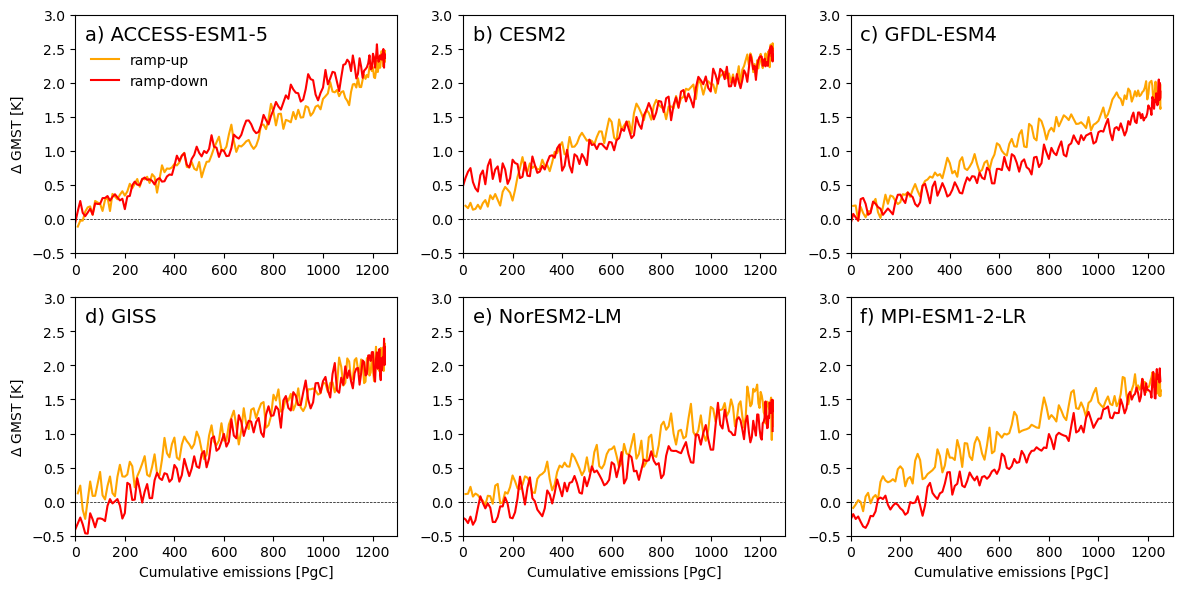

In [32]:
fls = ['a)','b)','c)','d)','e)','f)','g)']

window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    #sub.set_title(mdls[i])
    if i in (3, 4, 5):
        sub.set_xlabel("Cumulative emissions [PgC]")
    if i in (0, 3):
        sub.set_ylabel("$\Delta$ GMST [K]")
    sub.set_ylim(-0.5,3)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['tas'][0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], ed[mdls[i]]['flat10-cdr']['tas'][150:300], color="red", label='ramp-down')
    if i==0:
        sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(0.01, 0.89))
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
    sub.annotate(fls[i]+" "+mdls[i], xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

plt.tight_layout()


Atmospheric CO2

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/2553845576.py:10: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO2")


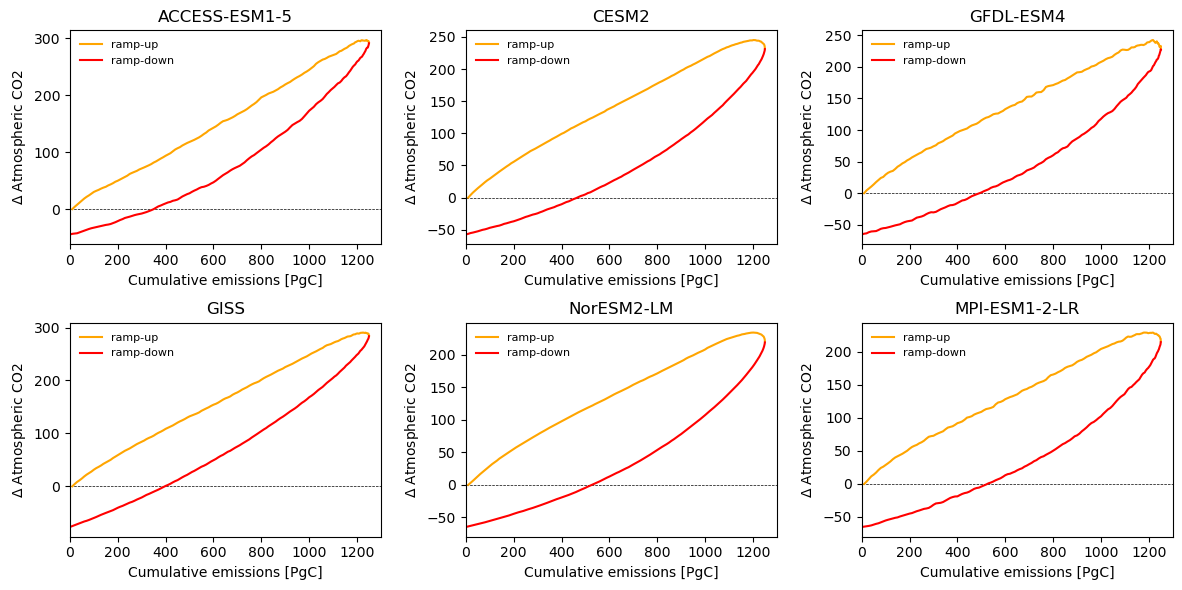

In [33]:
window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("$\Delta$ Atmospheric CO2")
    #sub.set_ylim(-0.5,3)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['co2'][0:150]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], ed[mdls[i]]['flat10-cdr']['co2'][150:300]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()

NBP

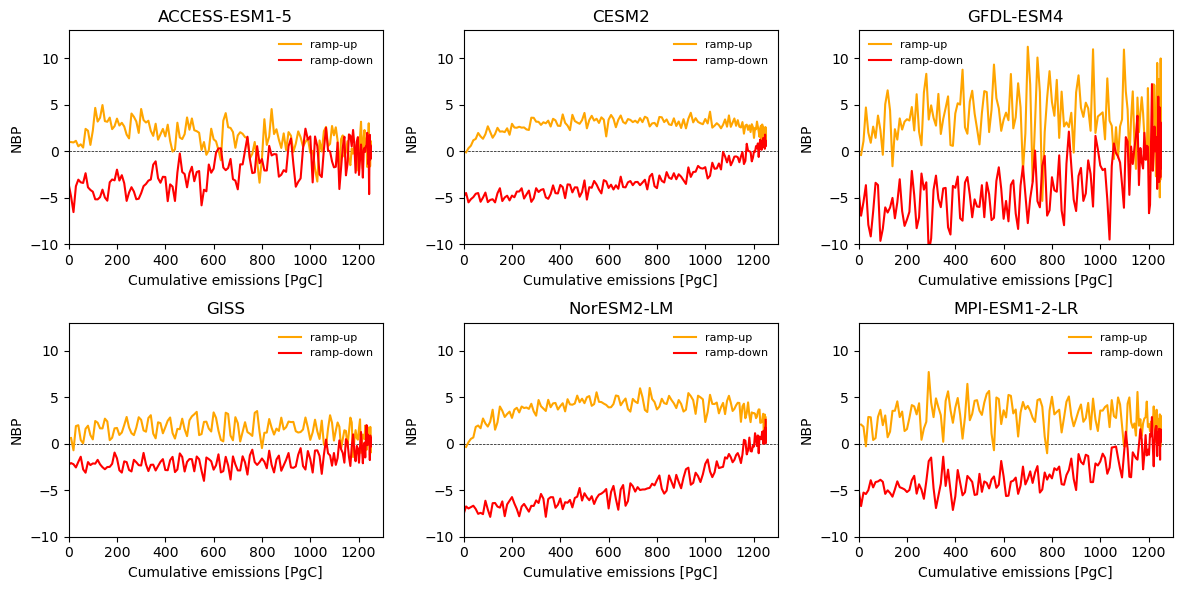

In [34]:
window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("NBP")
    sub.set_ylim(-10,13)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['nbp'][0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], ed[mdls[i]]['flat10-cdr']['nbp'][150:300], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


Cumulative NBP

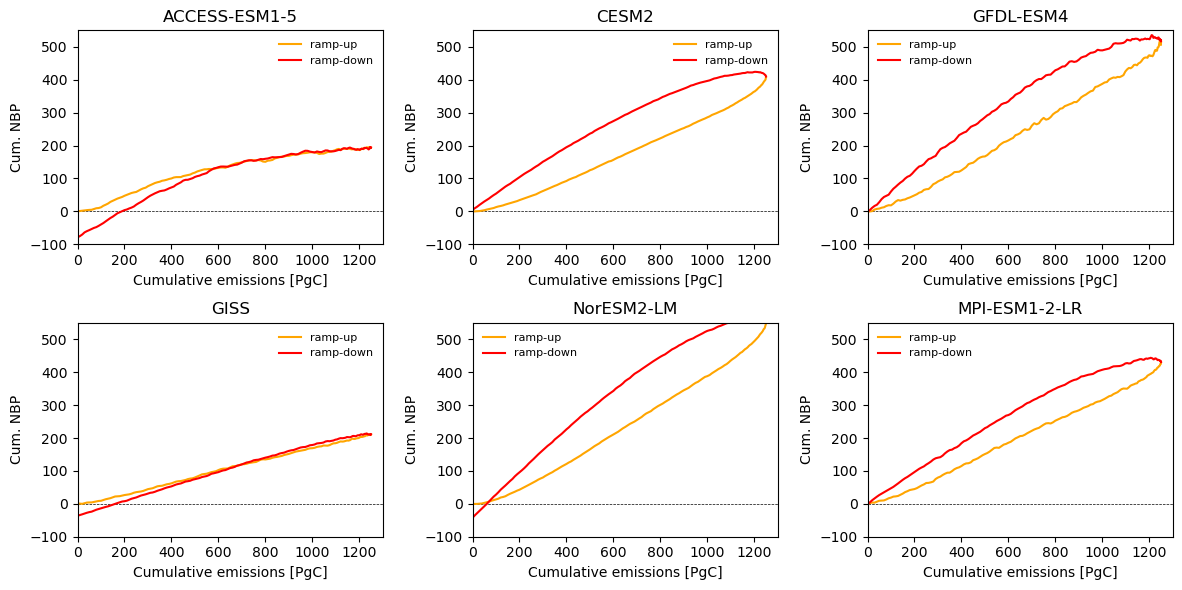

In [35]:
window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("Cum. NBP")
    sub.set_ylim(-100,550)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[150:300], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


fgco2

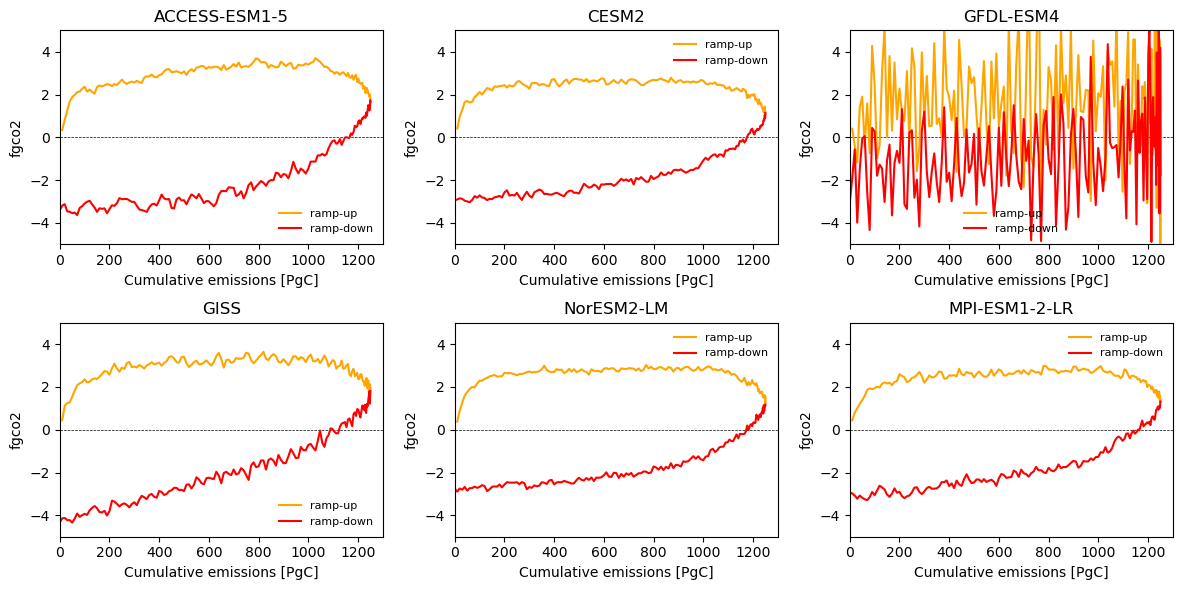

In [36]:
window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("fgco2")
    sub.set_ylim(-5,5)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['fgco2'][0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], ed[mdls[i]]['flat10-cdr']['fgco2'][150:300], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


cumulative fgco2

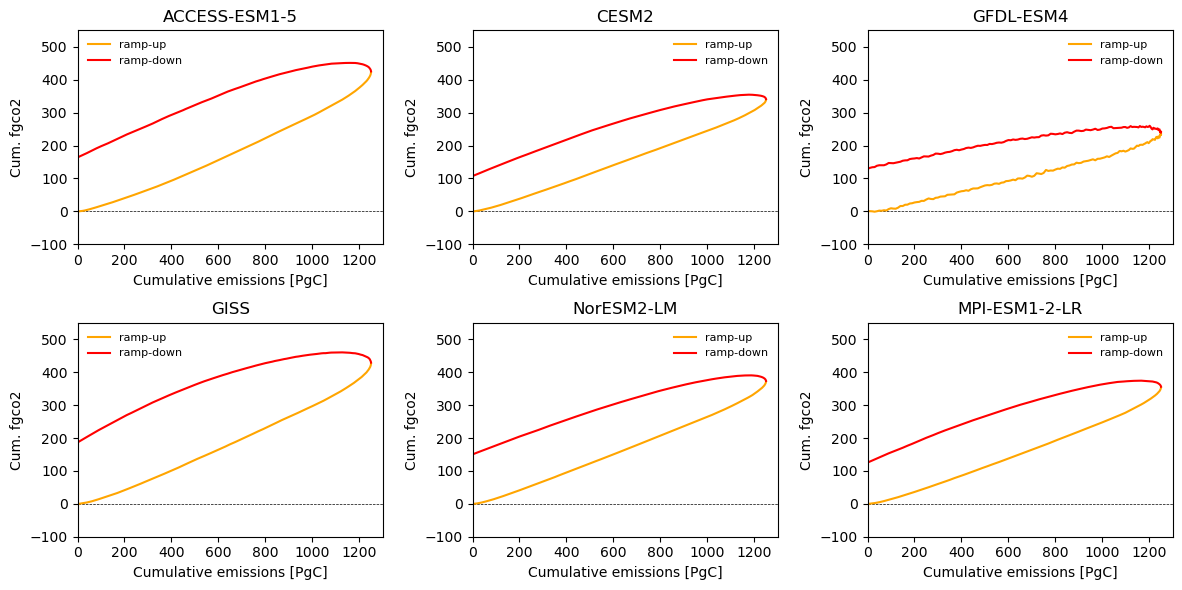

In [37]:
window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("Cum. fgco2")
    sub.set_ylim(-100,550)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[150:300], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


all carbon sinks

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/2626690242.py:12: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO2")


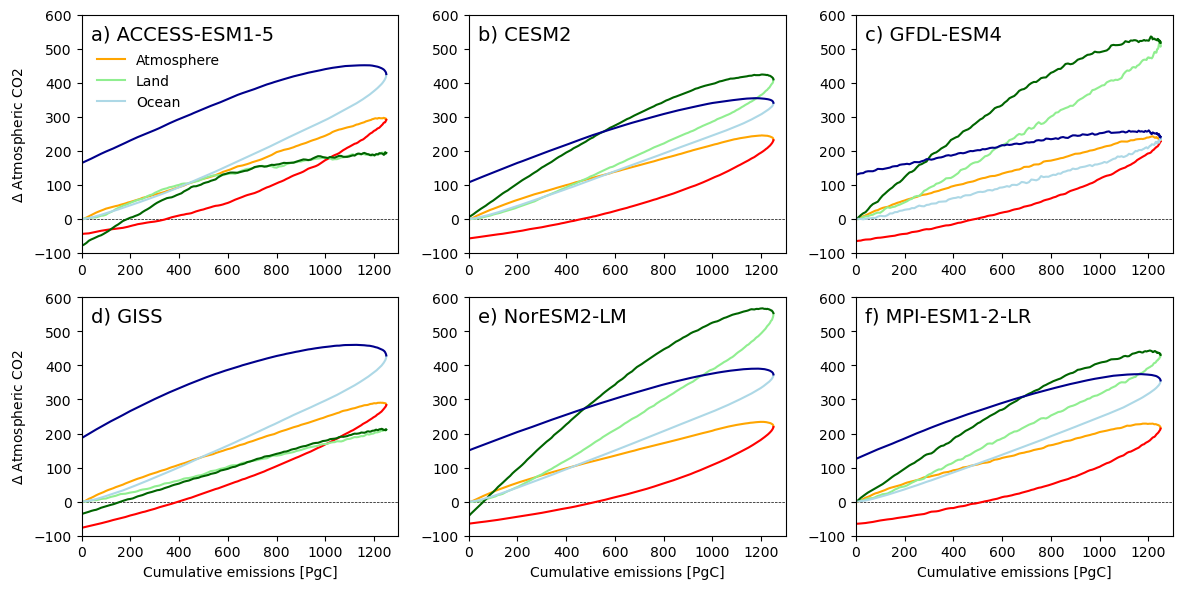

In [38]:
window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 3, i+1)

    #sub.set_title(mdls[i])
    if i in (3, 4, 5):
        sub.set_xlabel("Cumulative emissions [PgC]")
    if i in (0, 3):
        sub.set_ylabel("$\Delta$ Atmospheric CO2")
    sub.set_ylim(-100,600)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['co2'][0:150]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="orange", label='Atmosphere')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], ed[mdls[i]]['flat10-cdr']['co2'][150:300]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="red")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:150], color="lightgreen", label='Land')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[150:300], color="darkgreen")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:150], color="lightblue", label='Ocean')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[150:300], color="darkblue")
    if i==0:
        sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(0.01, 0.89))
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
    sub.annotate(fls[i]+" "+mdls[i], xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

plt.tight_layout()

In [38]:
window=21
time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'][0:300])-int(window/2))

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:53: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:53: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/452608761.py:11: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ GMST [K]")
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/452608761.py:27: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/452608761.py:40: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Land carbon sink [PgC]")
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/45260

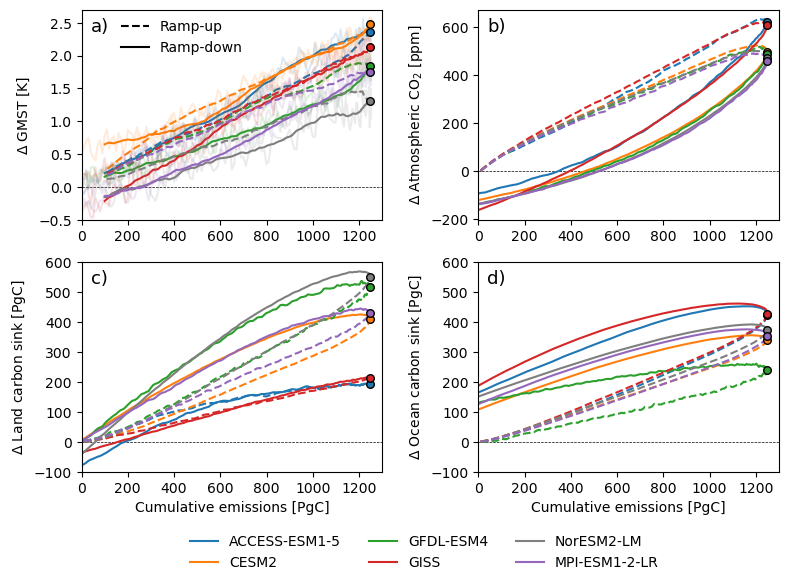

In [39]:
colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]
window=21
time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

fig = plt.figure(figsize=(9,6))

sub = fig.add_subplot(2, 2, 1)
sub.set_xlim(0,1300)
sub.set_ylim(-0.5,2.7)
#sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ GMST [K]")
# ESMs
for i in np.arange(0,len(mdls)):
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], ed[mdls[i]]['flat10-cdr']['tas'][0:300], color=colors[i], alpha=0.15)
    sub.plot(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], window), moving_average(ed[mdls[i]]['flat10-cdr']['tas'][0:150], window), color=colors[i], linestyle="--")
    sub.plot(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], window), moving_average(ed[mdls[i]]['flat10-cdr']['tas'][150:300], window), color=colors[i])
    sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], window)[139], moving_average(ed[mdls[i]]['flat10-cdr']['tas'][0:300], window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.plot([-99,-99], color="black", linestyle='--', label="Ramp-up")
sub.plot([-99,-99], color="black", linestyle='-', label="Ramp-down")
sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(0.09, 1.01))
sub.annotate('a)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')

sub = fig.add_subplot(2, 2, 2)
sub.set_xlim(0,1300)
#sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
# ESMs
for i in np.arange(0,len(mdls)):
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['C_atm'][0:150], color=colors[i], linestyle="--")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], ed[mdls[i]]['flat10-cdr']['C_atm'][150:300], color=colors[i])
    sub.scatter(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[149], ed[mdls[i]]['flat10-cdr']['C_atm'][149], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.annotate('b)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')

sub = fig.add_subplot(2, 2, 3)
sub.set_xlim(0,1300)
sub.set_ylim(-100,600)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Land carbon sink [PgC]")
# ESMs
for i in np.arange(0,len(mdls)):
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:150], color=colors[i], linestyle="--")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[150:300], color=colors[i])
    sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], window)[139], moving_average(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:300], window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.annotate('c)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')

sub = fig.add_subplot(2, 2, 4)
sub.set_xlim(0,1300)
sub.set_ylim(-100,600)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Ocean carbon sink [PgC]")
# ESMs
for i in np.arange(0,len(mdls)):
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:150], color=colors[i], linestyle="--")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:300], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[150:300], color=colors[i], label=mdls[i])
    sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], window)[139], moving_average(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:300], window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(-1.0, -0.24), ncol=3)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.annotate('d)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')

fig.subplots_adjust(wspace=0.32, hspace=0.2)
plt.savefig("images/flat10_ESM_results_hysteresis_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_hysteresis_panel.jpg", bbox_inches='tight')

#### Koven-type figure

In [40]:
from scipy.signal import savgol_filter

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/2515158300.py:23: SyntaxWarning: invalid escape sequence '\D'
  axs[3*i].set_ylabel('$\Delta$ Carbon\n[PgC/yr]')


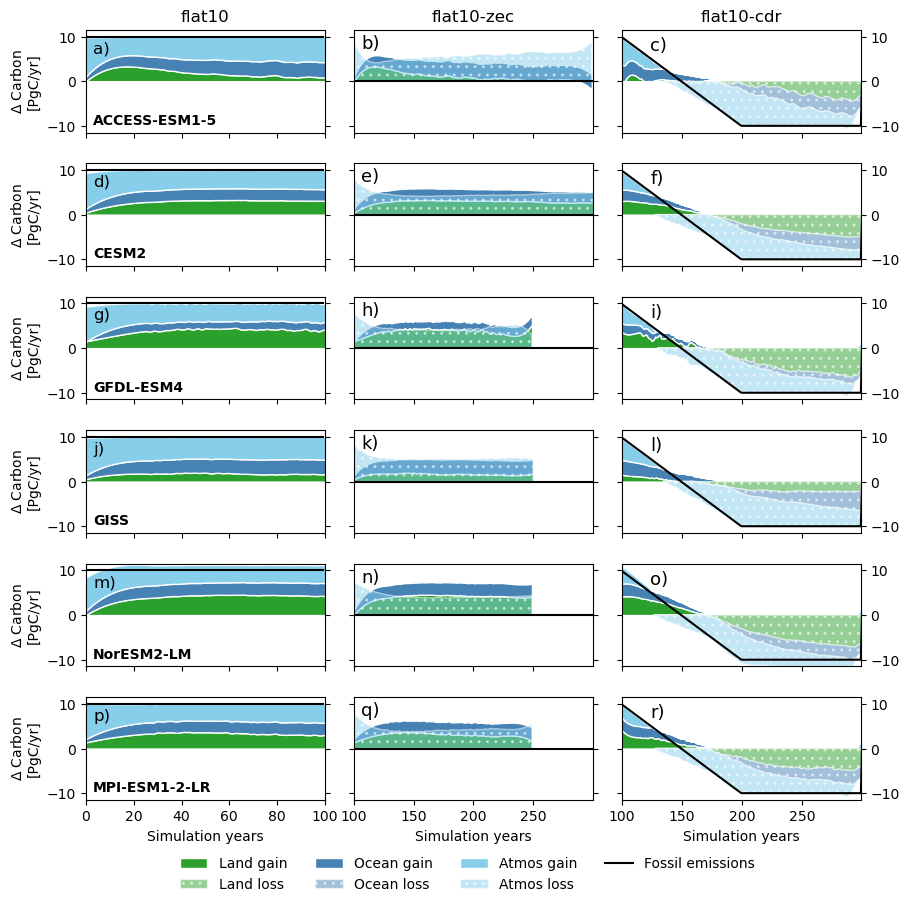

In [41]:
fls_c1 = ['a)','d)','g)','j)','m)','p)','s)']
fls_c2 = ['b)','e)','h)','k)','n)','q)','t)']
fls_c3 = ['c)','f)','i)','l)','o)','r)','u)']

fig, axs = plt.subplots(6, 3,figsize=[10,10])
axs=axs.flatten()
for i,m in enumerate(mdls):
    #print(m)
    
    tmpa=ed[m]['flat10']['C_atm'].diff('year').pad(year=(0,1),constant_values=0).copy()
    tmpa[-1]=tmpa[-2]
    tmpl=ed[m]['flat10']['nbp'].copy()
    tmpo=ed[m]['flat10']['fgco2'].copy()

    stmpa = savgol_filter(tmpa.squeeze(drop=True), 51, 3) 
    stmpl = savgol_filter(tmpl.squeeze(drop=True), 51, 3) 
    stmpo = savgol_filter(tmpo.squeeze(drop=True), 51, 3) 

    axs[3*i].stackplot(np.arange(0,len(tmpa)),stmpl,stmpo,stmpa,colors=['tab:green','steelblue','skyblue'],edgecolor="white")

    if i==0:
        axs[3*i].set_title('flat10')
    axs[3*i].set_ylabel('$\Delta$ Carbon\n[PgC/yr]')     
    axs[3*i].set_xlim([0,100])
    axs[3*i].set_ylim([-11.5,11.5])
    #axs[3*i].grid()
    axs[3*i].plot(e_flat10['Emission Rate (PgC a-1)'][:100].values,'k')
    if i in (0, 1, 2, 3, 4):
        axs[3*i].xaxis.set_ticklabels([])
    axs[3*i].annotate(m, xy=(0.03, 0.12), xycoords='axes fraction', fontsize=10, ha='left', va='center', weight="bold")
    axs[3*i].annotate(fls_c1[i], xy=(0.03, 0.82), xycoords='axes fraction', fontsize=12, ha='left', va='center')
    axs[3*i].tick_params(right=True)
    if i==5:
        axs[3*i].set_xlabel('Simulation years')

    try:
        tmpa=ed[m]['flat10-zec']['C_atm'].diff('year').pad(year=(0,1)).copy()
        tmpa[-1]=tmpa[-2]
        tmpl=ed[m]['flat10-zec']['nbp'].copy()
        tmpo=ed[m]['flat10-zec']['fgco2'].copy()
    
        axs[3*i+1].stackplot(np.arange(0,len(stmpa)),stmpl,stmpo,colors=['tab:green','steelblue','skyblue'],edgecolor="white")
        ppp=axs[3*i+1].stackplot(np.arange(0,len(stmpa)),stmpa,colors=['skyblue'])
        ppp[0].set_hatch("..")
        ppp[0].set_alpha(0.5)
        ppp[0].set_edgecolor('w')
        
    except:
        0
    if i==0:
        axs[3*i+1].set_title('flat10-zec')
    axs[3*i+1].set_xlim([0,200])
    #axs[3*i+1].grid() 
    axs[3*i+1].set_ylim([-11.5,11.5])
    axs[3*i+1].plot(e_flat10_zec['Emission Rate (PgC a-1)'][100:].values,'k')
    axs[3*i+1].set_xticks([0,50,100,150])
    axs[3*i+1].set_xticklabels([100,150,200,250])
    if i in (0, 1, 2, 3, 4):
        axs[3*i+1].xaxis.set_ticklabels([])
    axs[3*i+1].yaxis.set_ticklabels([])
    axs[3*i+1].tick_params(right=True)
    axs[3*i+1].annotate(fls_c2[i], xy=(0.03, 0.87), xycoords='axes fraction', fontsize=13, ha='left', va='center')
    if i==5:
        axs[3*i+1].set_xlabel('Simulation years')
    
    try:
        tmpa=ed[m]['flat10-cdr']['C_atm'].diff('year').pad(year=(0,1)).copy()
        tmpa[-1]=tmpa[-2]
        tmpl=ed[m]['flat10-cdr']['nbp'].copy()
        tmpo=ed[m]['flat10-cdr']['fgco2'].copy()
        if m=='NorESM2-LM':
            tmpa[16]=tmpa[15]
            tmpa[17]=tmpa[18]
        #    tmpo[:17]=10-tmpl[:17]-tmpa[:17]
        stmpa = savgol_filter(tmpa[100:].squeeze(drop=True), 31, 3) 
        stmpl = savgol_filter(tmpl[100:].squeeze(drop=True), 31, 3) 
        stmpo = savgol_filter(tmpo[100:].squeeze(drop=True), 31, 3) 
        
        stmpa_neg=np.clip(stmpa,-1e10,0)
        stmpa_pos=np.clip(stmpa,0,1e10)
        stmpo_neg=np.clip(stmpo,-1e10,0)
        stmpo_pos=np.clip(stmpo,0,1e10)
        stmpl_neg=np.clip(stmpl,-1e10,0)
        stmpl_pos=np.clip(stmpl,0,1e10)
        crs1=np.argmin(stmpa_pos>0)
        crs2=np.argmin(stmpl_pos>0)
        
        axs[3*i+2].stackplot(np.arange(0,len(stmpa)),stmpl_pos[:],stmpo_pos[:],stmpa_pos[:],colors=['tab:green','steelblue','skyblue'],labels=['Land gain','Ocean gain','Atmos gain'],edgecolor="white")

        pp3=axs[3*i+2].stackplot(np.arange(crs1,len(stmpa)),stmpl_neg[crs1:],stmpo_neg[crs1:],stmpa_neg[crs1:],colors=['tab:green','steelblue','skyblue'],labels=['Land loss','Ocean loss','Atmos loss'],edgecolor="white")
        for pp in pp3:
            pp.set_hatch("..")  
            pp.set_edgecolor('w')  
            pp.set_alpha(0.5)
        
    except:
        0
    if i==0:
        axs[3*i+2].set_title('flat10-cdr')
    axs[3*i+2].set_xlim([0,199])
    #axs[3*i+2].grid() 
    axs[3*i+2].set_ylim([-11.5,11.5])
    axs[3*i+2].yaxis.set_label_position("right")
    axs[3*i+2].yaxis.tick_right()
    axs[3*i+2].set_xticks([0,50,100,150])
    axs[3*i+2].set_xticklabels([100,150,200,250])
    if i in (0, 1, 2, 3, 4):
        axs[3*i+2].xaxis.set_ticklabels([])
    axs[3*i+2].tick_params(left=True)
    axs[3*i+2].annotate(fls_c3[i], xy=(0.12, 0.85), xycoords='axes fraction', fontsize=13, ha='left', va='center')
    if i==5:
        axs[3*i+2].set_xlabel('Simulation years')
    
    axs[3*i+2].plot(e_flat10_cdr['Emission Rate (PgC a-1)'][100:].values,'k',label='Fossil emissions')
    

    # legend
    handles, labels = axs[3*i+2].get_legend_handles_labels()
    order = [0,3,1,4,2,5,6]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False, bbox_to_anchor=(-1.9, -0.43), loc='upper left', ncol=4)

#plt.tight_layout()
fig.subplots_adjust(wspace=0.12, hspace=0.3)

plt.savefig("images/flat10_ESM_results_carbon_fluxes.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_carbon_fluxes.jpg", bbox_inches='tight')


# SCM vs. ESM

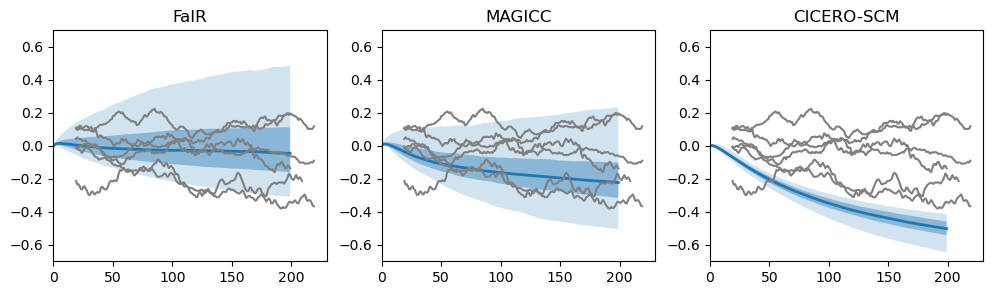

In [42]:
# esm-flat10_zec

fig, axes = plt.subplots(1,3,figsize=(12, 3))

dd = ds_fair.temperature.sel(scenario='esm-flat10_zec')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[0].set_title("FaIR")
axes[0].set_xlim(0,230)
axes[0].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[0].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[0].plot(np.percentile(dds,50,1),lw=2)
axes[0].set_ylim(-0.7,0.7)
for i,m in enumerate(mdls):
    axes[0].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_magicc.temperature.sel(scenario='esm-flat10_zec')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[1].set_title("MAGICC")
axes[1].set_xlim(0,230)
axes[1].fill_between(np.arange(0,200),np.percentile(dds,5,0),np.percentile(dds,95,0),color="tab:blue",alpha=0.2, edgecolor="none")
axes[1].fill_between(np.arange(0,200),np.percentile(dds,25,0),np.percentile(dds,75,0),color="tab:blue",alpha=0.4, edgecolor="none")
axes[1].plot(np.percentile(dds,50,0),lw=2)
axes[1].set_ylim(-0.7,0.7)
for i,m in enumerate(mdls):
    axes[1].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_cicero.temperature.sel(scenario='esm-flat10_zec')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[2].set_title("CICERO-SCM")
axes[2].set_xlim(0,230)
axes[2].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[2].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[2].plot(np.percentile(dds,50,1),lw=2)
axes[2].set_ylim(-0.7,0.7)
for i,m in enumerate(mdls):
    axes[2].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

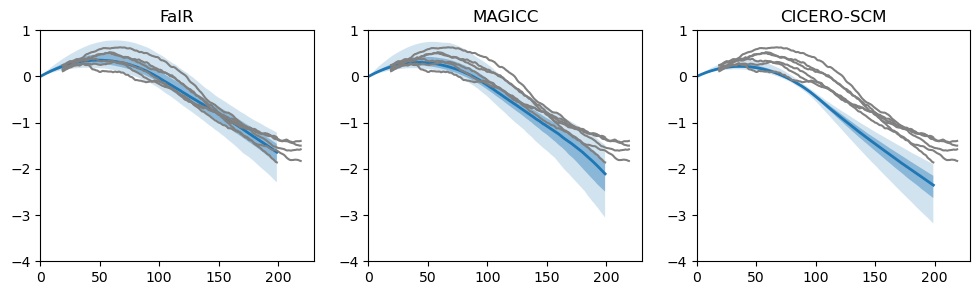

In [43]:
# esm-flat10_cdr

fig, axes = plt.subplots(1,3,figsize=(12, 3))

dd = ds_fair.temperature.sel(scenario='esm-flat10_cdr')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[0].set_title("FaIR")
axes[0].set_xlim(0,230)
axes[0].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[0].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[0].plot(np.percentile(dds,50,1),lw=2)
axes[0].set_ylim(-4,1)
for i,m in enumerate(mdls):
    axes[0].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_magicc.temperature.sel(scenario='esm-flat10_cdr')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[1].set_title("MAGICC")
axes[1].set_xlim(0,230)
axes[1].fill_between(np.arange(0,200),np.percentile(dds,5,0),np.percentile(dds,95,0),color="tab:blue",alpha=0.2, edgecolor="none")
axes[1].fill_between(np.arange(0,200),np.percentile(dds,25,0),np.percentile(dds,75,0),color="tab:blue",alpha=0.4, edgecolor="none")
axes[1].plot(np.percentile(dds,50,0),lw=2)
axes[1].set_ylim(-4,1)
for i,m in enumerate(mdls):
    axes[1].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_cicero.temperature.sel(scenario='esm-flat10_cdr')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[2].set_title("CICERO-SCM")
axes[2].set_xlim(0,230)
axes[2].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[2].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[2].plot(np.percentile(dds,50,1),lw=2)
axes[2].set_ylim(-4,1)
for i,m in enumerate(mdls):
    axes[2].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:102: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:102: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/1432499324.py:36: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_ylabel('$\Delta$ GMST [K]')
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/1432499324.py:69: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_ylabel('$\Delta$ GMST - TCRE [K]')
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_26297/1432499324.py:102: SyntaxWarning: invalid escape sequence '\D'
  axs[2].set_ylabel('$\Delta$ GMST - TCRE [K]')


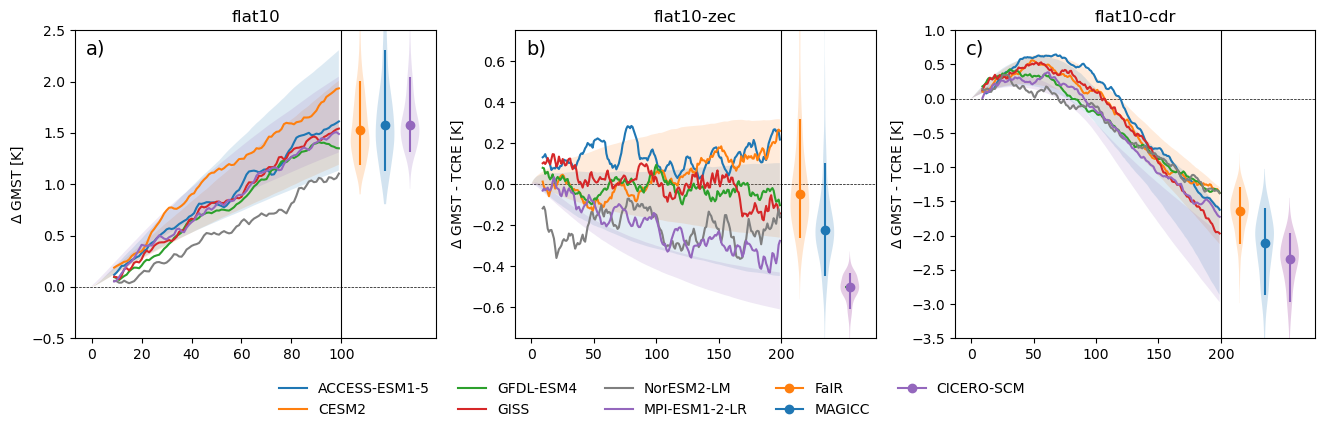

In [44]:
# combined SCM and ESM results

mcols=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]

fig, axs = plt.subplots(1, 3,figsize=[16,4])
axs=axs.flatten()

# subfigure 1
plot_range(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),axs[0],prctl=[10,50,90],col='tab:orange')
pv = axs[0].violinplot(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100))[-1], [107.5], widths=7.5, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:orange'), pc.set_alpha(0.2)
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),107.5,99,axs[0],prctl=[10,50,90],col='tab:orange',linestyle='-')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)).T,axs[0],prctl=[10,50,90],col="tab:blue")
pv = axs[0].violinplot(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)).T[-1], [117.5], widths=7.5, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:blue'), pc.set_alpha(0.2)
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(00,100)).T,117.5,99,axs[0],prctl=[10,50,90],col='tab:blue',linestyle='-')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),axs[0],prctl=[10,50,90],col='tab:purple')
pv = axs[0].violinplot(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100))[-1], [127.5], widths=7.5, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:purple'), pc.set_alpha(0.2)
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(00,100)),127.5,99,axs[0],prctl=[10,50,90],col='tab:purple',linestyle='-')

pl=[]
for i,m in enumerate(mdls):
    try:
     cn0=ed[m]['flat10']['tas'][:20].mean()-(ed[m]['flat10']['tas'][10:30:1].mean()-ed[m]['flat10']['tas'][:20].mean())
     tmp==axs[0].plot(ed[m]['flat10']['tas'][:100].rolling(year=10).mean()-cn0,color=mcols[i],label=m)
     pl.append(tmp[0])
    except:
        0
    axs[0].set_ylim([-0.5,2.5])
axs[0].set_xticks([0,20,40,60,80,100])
axs[0].set_xticklabels([0,20,40,60,80,100])
axs[0].set_title('flat10')
axs[0].set_ylabel('$\Delta$ GMST [K]')
axs[0].axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
axs[0].axvline(100, color="black", lw=0.8)
axs[0].legend(frameon=False, ncol=3, bbox_to_anchor=(1.9, -0.1))
axs[0].annotate('a)', xy=(0.03, 0.94), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 2
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100,axs[1],prctl=[10,50,90],col='tab:orange')
pv = axs[1].violinplot((ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100)[-1], [215], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:orange'), pc.set_alpha(0.2)
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100,215,199,axs[1],prctl=[10,50,90],col='tab:orange',linestyle='-',lbl='FaIR')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100,axs[1],prctl=[10,50,90])
pv = axs[1].violinplot((ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100)[-1], [235], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:blue'), pc.set_alpha(0.2)
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100,235,199,axs[1],prctl=[10,50,90],col='tab:blue',linestyle='-',lbl='MAGICC')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100,axs[1],prctl=[10,50,90],col='tab:purple')
pv = axs[1].violinplot((ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100)[-1], [255], widths=15, quantiles=[0.5], showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('purple'), pc.set_alpha(0.2)
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100,255,199,axs[1],prctl=[10,50,90],col='tab:purple',linestyle='-',lbl='CICERO-SCM')

pl=[]
for i,m in enumerate(mdls):
    try:
     tmp==axs[1].plot(ed[m]['flat10-zec']['tas'][100:300].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),color=mcols[i])
     pl.append(tmp[0])
    except:
        0
axs[1].set_ylim([-0.75,0.75])
axs[1].set_xticks([0,50,100,150,200])
axs[1].set_xticklabels([0,50,100,150,200])
axs[1].set_title('flat10-zec')
axs[1].set_ylabel('$\Delta$ GMST - TCRE [K]')
axs[1].axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
axs[1].axvline(200, color="black", lw=0.8)
axs[1].legend(frameon=False, ncol=2, bbox_to_anchor=(1.45, -0.1))
axs[1].annotate('b)', xy=(0.03, 0.94), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 3
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,axs[2],prctl=[10,50,90],col='tab:orange')
pv = axs[2].violinplot((ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100)[-1], [215], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:orange'), pc.set_alpha(0.2)
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,215,199,axs[2],prctl=[10,50,90],col='tab:orange',linestyle='-',lbl='FaIR')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,axs[2],prctl=[10,50,90], col="tab:blue")
pv = axs[2].violinplot((ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100)[-1], [235], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:blue'), pc.set_alpha(0.2)
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,235,199,axs[2],prctl=[10,50,90],col='tab:blue',linestyle='-',lbl='MAGICC')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100,axs[2],prctl=[10,50,90],col='tab:purple')
pv = axs[2].violinplot((ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100)[-1], [255], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('purple'), pc.set_alpha(0.2)
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100,255,199,axs[2],prctl=[10,50,90],col='tab:purple',linestyle='-',lbl='CICERO')

pl=[]
for i,m in enumerate(mdls):
    try:
     tmp==axs[2].plot(ed[m]['flat10-cdr']['tas'][100:300].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),color=mcols[i],label=m)
     pl.append(tmp[0])
    except:
        0
    axs[2].set_ylim([-3.5,1])
axs[2].set_xticks([0,50,100,150,200])
axs[2].set_xticklabels([0,50,100,150,200])
axs[2].set_title('flat10-cdr')
axs[2].set_ylabel('$\Delta$ GMST - TCRE [K]')
axs[2].axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
axs[2].axvline(200, color="black", lw=0.8)
axs[2].annotate('c)', xy=(0.03, 0.94), xycoords='axes fraction', fontsize=14, ha='left', va='center')

fig.subplots_adjust(wspace=0.22, hspace=0.2)
#plt.tight_layout()
    
plt.savefig("images/flat10_SCM_ESM_results_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_ESM_results_panel.jpg", bbox_inches='tight')

# Metrics and 1pctCO2 comparison

flat10 SCMs

In [45]:
tcre100f=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
tcre100m=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

zec50f=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
zec50m=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

zec100f=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
zec100m=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

flat10 ESMs

In [46]:
esm_tcre_flat10=np.zeros(len(mdls))
esm_zec50_flat10=np.zeros(len(mdls))
esm_zec100_flat10=np.zeros(len(mdls))

for i,m in enumerate(mdls):
    esm_tcre_flat10[i]=ed[m]['flat10']['tas'][90:110].mean().values
    esm_zec50_flat10[i]=(ed[m]['flat10-zec']['tas'][140:160].mean().values)-esm_tcre_flat10[i]
    esm_zec100_flat10[i]=(ed[m]['flat10-zec']['tas'][190:210].mean().values)-esm_tcre_flat10[i]

print("TCRE:", esm_tcre_flat10)
print("ZEC50:", esm_zec50_flat10)
print("ZEC100:", esm_zec100_flat10)

TCRE: [1.74455571 1.95511848 1.49980009 1.64084549 1.2026242  1.45670009]
ZEC50: [ 0.19048309 -0.10850894 -0.05745387  0.02743683 -0.13387343 -0.13691401]
ZEC100: [ 0.11545253  0.02811119  0.03885496 -0.02396088 -0.22167358 -0.23693848]


1pctCO2 SCMs

In [47]:
fair_metrics_1pct=pd.read_csv('SCM_data/metrics/FaIR_metrics.csv',index_col=0)
magicc_metrics_1pct=pd.read_csv('SCM_data/metrics/MAGICC_metrics.csv',index_col=0)

fair_metrics_1pct

tcre     zec50    zec100
1230     1.908141 -0.176201 -0.307369
1715     1.204298 -0.141009 -0.179506
2658     2.193757  0.565341  0.802064
3898     2.135317  0.789266  1.202779
5915     1.943801 -0.144263 -0.183165
...           ...       ...       ...
1494559  1.971386  0.001661  0.036484
1495435  1.774262  0.029313 -0.012182
1497041  1.788985  0.219264  0.284737
1497105  1.687556 -0.169742 -0.224546
1498424  2.107960  0.281953  0.187217

[1001 rows x 3 columns]

1pctCO2 ESMs

In [48]:
data = {'Name': ['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','MPI-ESM1-2-LR'],
        'TCRE': [1.9,2.0,1.2,np.NaN,1.32,1.65],
        'TCR':[1.9,2.0,1.2,np.NaN,1.32,1.65],
        'CUMEM':[1064,1073,1066,np.NaN,1075,1127]}
df_zec_1pct = pd.DataFrame(data)

df_zec_1pct

Name  TCRE   TCR   CUMEM
0  ACCESS-ESM1-5  1.90  1.90  1064.0
1          CESM2  2.00  2.00  1073.0
2      GFDL-ESM4  1.20  1.20  1066.0
3           GISS   NaN   NaN     NaN
4     NorESM2-LM  1.32  1.32  1075.0
5  MPI-ESM1-2-LR  1.65  1.65  1127.0

flat10 vs. 1pctCO2

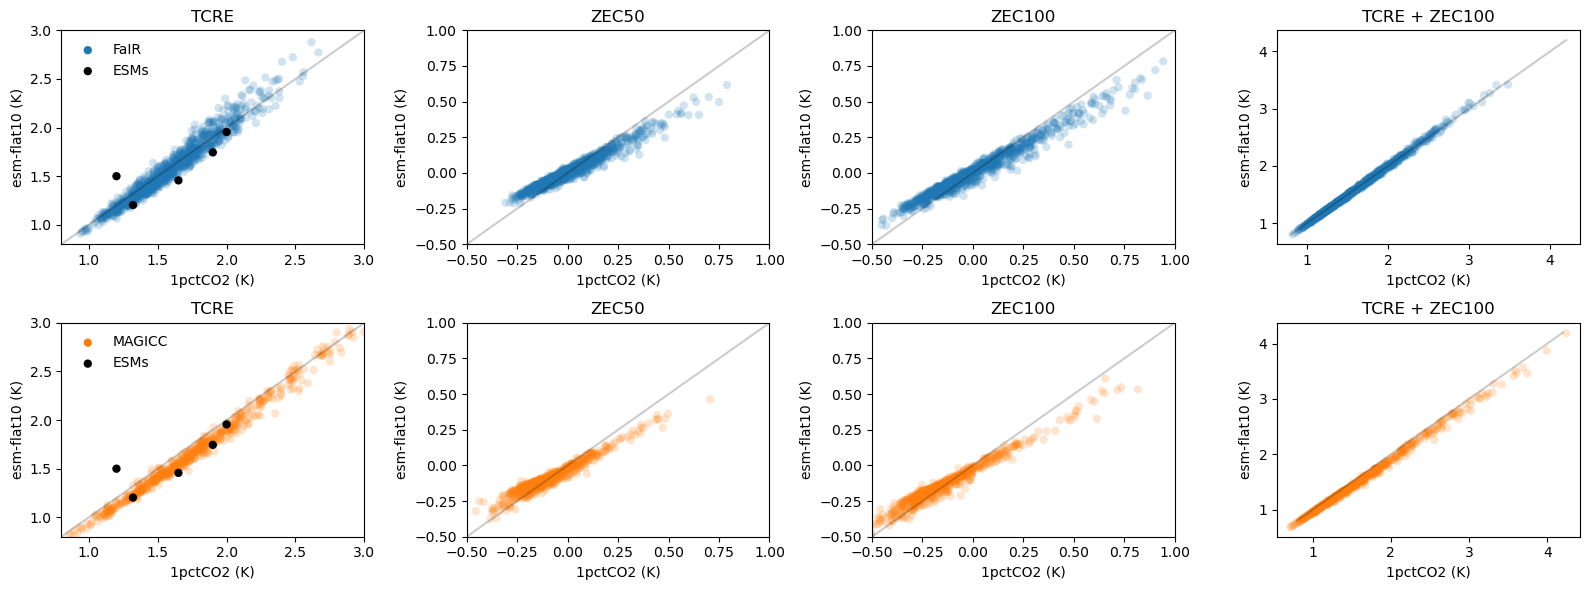

In [49]:

fig = plt.figure(figsize=[16,6])

# FAIR
sub = fig.add_subplot(2,4,1)
sub.set_title("TCRE")
sub.scatter(fair_metrics_1pct['tcre'],tcre100f, color='tab:blue', alpha=0.2, edgecolor="none")
#sub.scatter(magicc_metrics['tcre_1pctco2'],tcre100m, color='tab:orange',alpha=0.2, edgecolor="none")
sub.scatter(df_zec_1pct['TCRE'],esm_tcre_flat10, color="black", edgecolor="none")
sub.plot([0.8,3],[.8,3],'k-',alpha=0.2)
sub.set_xlim(0.8,3)
sub.set_ylim(0.8,3)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')
sub.scatter(-99,-99, color='tab:blue', alpha=1, edgecolor="none", label="FaIR")
#sub.scatter(-99,-99, color='tab:orange', alpha=1, edgecolor="none", label="MAGICC")
sub.scatter(-99,-99, color="black", edgecolor="none", label="ESMs")
sub.legend(frameon=False)

sub = fig.add_subplot(2,4,2)
sub.set_title("ZEC50")
sub.scatter(fair_metrics_1pct['zec50'],ds_fair.zec50 ,alpha=0.2, color='tab:blue', edgecolor="none")
#sub.scatter(magicc_metrics['zec50_esm-1pct-brch-1000pgc'],zec50m, color='tab:orange', alpha=0.2, edgecolor="none")
sub.plot([-.5,1],[-.5,1],'k-',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')

sub = fig.add_subplot(2,4,3)
sub.set_title("ZEC100")
sub.scatter(fair_metrics_1pct['zec100'], ds_fair.zec100 ,alpha=0.2, color='tab:blue', edgecolor="none")
#sub.scatter(magicc_metrics['zec100_esm-1pct-brch-1000pgc'], zec100m, color='tab:orange', alpha=0.2, edgecolor="none")
sub.plot([-.5,1],[-.5,1],'k-',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')

sub = fig.add_subplot(2,4,4)
sub.set_title("TCRE + ZEC100")
sub.scatter(fair_metrics_1pct['zec100']+fair_metrics_1pct['tcre'],ds_fair.zec100+ds_fair.tcre, alpha=0.2,color='tab:blue', edgecolor="none")
#sub.scatter(magicc_metrics['zec100_esm-1pct-brch-1000pgc']+magicc_metrics['tcre_1pctco2'],zec100m+tcre100m, color='tab:orange',alpha=0.2, edgecolor="none")
sub.plot([0.8,4.2],[0.8,4.2],'k-',alpha=0.2)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')

# MAGICC
sub = fig.add_subplot(2,4,5)
sub.set_title("TCRE")
#sub.scatter(fair_metrics['tcre'],tcre100f, color='tab:blue', alpha=0.2, edgecolor="none")
sub.scatter(magicc_metrics_1pct['tcre_1pctco2'],tcre100m, color='tab:orange',alpha=0.2, edgecolor="none")
sub.plot([0.8,3],[.8,3],'k-',alpha=0.2)
sub.set_xlim(0.8,3)
sub.set_ylim(0.8,3)
sub.scatter(df_zec_1pct['TCRE'],esm_tcre_flat10, color="black", edgecolor="none")
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')
#sub.scatter(-99,-99, color='tab:blue', alpha=1, edgecolor="none", label="FaIR")
sub.scatter(-99,-99, color='tab:orange', alpha=1, edgecolor="none", label="MAGICC")
sub.scatter(-99,-99, color="black", edgecolor="none", label="ESMs")
sub.legend(frameon=False)

sub = fig.add_subplot(2,4,6)
sub.set_title("ZEC50")
#sub.scatter(fair_metrics['zec50'],ds_fair.zec50 ,alpha=0.2, color='tab:blue', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'],zec50m, color='tab:orange', alpha=0.2, edgecolor="none")
sub.plot([-.5,1],[-.5,1],'k-',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')

sub = fig.add_subplot(2,4,7)
sub.set_title("ZEC100")
#sub.scatter(fair_metrics['zec100'], ds_fair.zec100 ,alpha=0.2, color='tab:blue', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'], zec100m, color='tab:orange', alpha=0.2, edgecolor="none")
sub.plot([-.5,1],[-.5,1],'k-',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')

sub = fig.add_subplot(2,4,8)
sub.set_title("TCRE + ZEC100")
#sub.scatter(fair_metrics['zec100']+fair_metrics['tcre'],ds_fair.zec100+ds_fair.tcre, alpha=0.2,color='tab:blue', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc']+magicc_metrics_1pct['tcre_1pctco2'],zec100m+tcre100m, color='tab:orange',alpha=0.2, edgecolor="none")
sub.plot([0.8,4.2],[0.8,4.2],'k-',alpha=0.2)
sub.set_ylabel('esm-flat10 (K)')
sub.set_xlabel('1pctCO2 (K)')

plt.tight_layout()

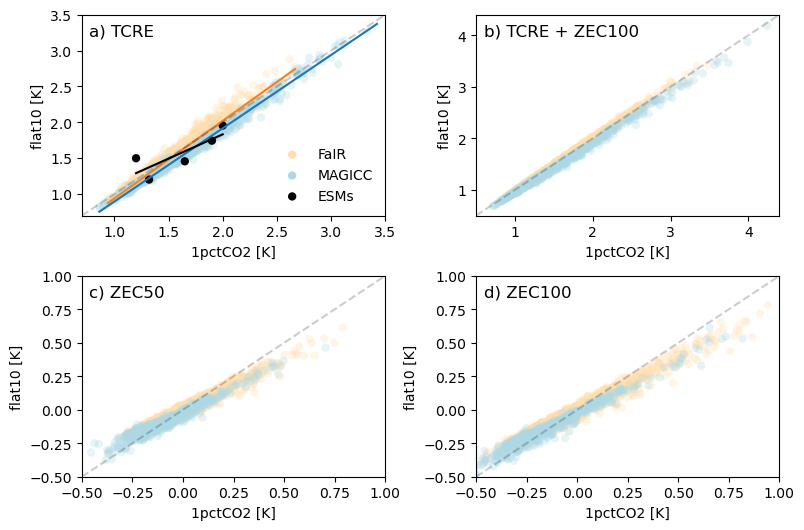

In [50]:

fig = plt.figure(figsize=[9,6])

### subplot 1
sub = fig.add_subplot(2,2,1)
sub.scatter(fair_metrics_1pct['tcre'],tcre100f, color='navajowhite', alpha=0.3, edgecolor="none")
sub.scatter(magicc_metrics_1pct['tcre_1pctco2'],tcre100m, color='lightblue',alpha=0.3, edgecolor="none")
sub.scatter(df_zec_1pct['TCRE'],esm_tcre_flat10, color="black", edgecolor="none")
# FaIR best fit
x = np.array(fair_metrics_1pct['tcre'])
y = np.array(tcre100f)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
#MAGICC best fit
x = np.array(magicc_metrics_1pct['tcre_1pctco2'])
y = np.array(tcre100m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
# ESM best fit
x = np.array(df_zec_1pct['TCRE'])[np.isfinite(np.array(df_zec_1pct['TCRE']))]
y = np.array(esm_tcre_flat10)[np.isfinite(np.array(df_zec_1pct['TCRE']))]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")

sub.plot([0.7,3.5],[.7,3.5],'k--',alpha=0.2)
sub.set_xlim(0.7,3.5)
sub.set_ylim(0.7,3.5)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.scatter(-99,-99, color='navajowhite', alpha=1, edgecolor="none", label="FaIR")
sub.scatter(-99,-99, color='lightblue', alpha=1, edgecolor="none", label="MAGICC")
sub.scatter(-99,-99, color="black", edgecolor="none", label="ESMs")
sub.legend(frameon=False, loc="lower right", prop={'size': 10})#, bbox_to_anchor=(0.05, 1.01))
sub.annotate('a) TCRE', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 2
sub = fig.add_subplot(2,2,2)
sub.scatter(fair_metrics_1pct['zec100']+fair_metrics_1pct['tcre'],ds_fair.zec100+ds_fair.tcre, alpha=0.3,color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc']+magicc_metrics_1pct['tcre_1pctco2'],zec100m+tcre100m, color='lightblue',alpha=0.3, edgecolor="none")
sub.plot([0.5,4.4],[0.5,4.4],'k--',alpha=0.2)
sub.set_xlim(0.5,4.4)
sub.set_ylim(0.5,4.4)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('b) TCRE + ZEC100', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 3
sub = fig.add_subplot(2,2,3)
sub.scatter(fair_metrics_1pct['zec50'],ds_fair.zec50 ,alpha=0.3, color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'],zec50m, color='lightblue', alpha=0.3, edgecolor="none")
sub.plot([-.5,1],[-.5,1],'k--',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('c) ZEC50', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 4
sub = fig.add_subplot(2,2,4)
sub.scatter(fair_metrics_1pct['zec100'], ds_fair.zec100 ,alpha=0.3, color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'], zec100m, color='lightblue', alpha=0.3, edgecolor="none")
sub.plot([-.5,1],[-.5,1],'k--',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('d) ZEC100', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig("images/flat10_SCM_ESM_metric_correlations.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_ESM_metric_correlations.jpg", bbox_inches='tight')

# Predictions from flat10 metrics

In [51]:
import scipy
from scipy import signal

In [52]:
agtp_simp=np.zeros([1000,len(mdls)])
agtp_corr=np.zeros([1000,len(mdls)])
agtp_corr2=np.zeros([1000,len(mdls)])

for i,m in enumerate(mdls):

    tc_tst=(ed[m]['flat10'].tas[90:110]-ed[m]['flat10-cdr'].tas[0]).mean()
    zec50_tst=ed[m]['flat10-zec'].tas[140:160].mean()-ed[m]['flat10'].tas[90:110].mean()
    zec100_tst=ed[m]['flat10-zec'].tas[190:210].mean()-ed[m]['flat10'].tas[90:110].mean()
    tc_corr2=(tc_tst-zec100_tst/2)/np.sum(ed[m]['flat10'].fco2fos[:100])
    tc_corr=(tc_tst-zec50_tst)/np.sum(ed[m]['flat10'].fco2fos[:100])
    tc_simp=(tc_tst)/np.sum(ed[m]['flat10'].fco2fos[:100])
    agtp_simp[:,i]=tc_simp.values*np.ones(1000)
    agtp_corr[:,i]=tc_corr.values*np.ones(1000)+np.arange(0,1000)*zec50_tst.values/50/1000
    agtp_corr2[:,i]=tc_corr2.values*np.ones(1000)+np.arange(0,1000)*zec100_tst.values/100/1000

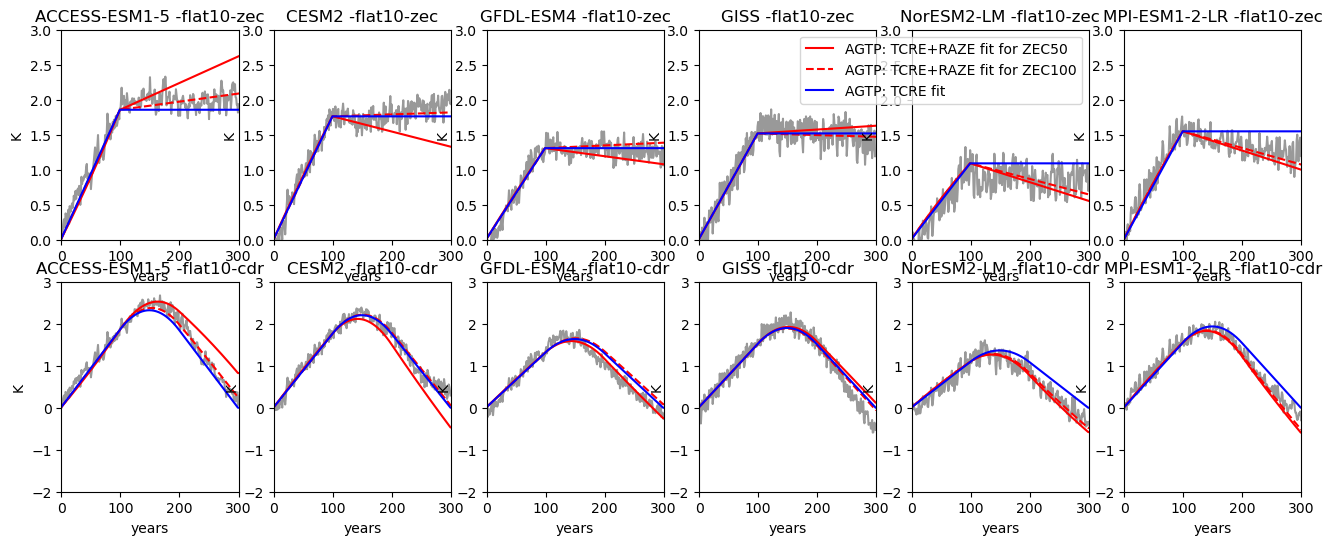

In [53]:

fig, axs = plt.subplots(2, 6,figsize=[16,6])
axs=axs.T
for i,m in enumerate(mdls):
    axs[i,0].plot(ed[m]['flat10-zec'].tas-ed[m]['flat10-cdr'].tas[0],'k',alpha=0.4)

    p1=axs[i,0].plot(signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'r')
    p2=axs[i,0].plot(signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'r--')
    p3=axs[i,0].plot(signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'b')

    axs[i,0].set_xlim(0,300)
    axs[i,0].set_ylim(0,3)
    
    axs[i,0].set_xlabel('years')
    axs[i,0].set_ylabel('K')
    axs[i,0].set_title(m+' -flat10-zec')
    axs[i,1].plot(ed[m]['flat10-cdr'].tas-ed[m]['flat10-cdr'].tas[0],'k',alpha=0.4)

    axs[i,1].plot(signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'r')
    axs[i,1].plot(signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'r--')
    axs[i,1].plot(signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'b')

    axs[i,1].set_xlim(0,300)
    axs[i,1].set_ylim(-2,3)
    
    axs[i,1].set_xlabel('years')
    axs[i,1].set_ylabel('K')
    axs[i,1].set_title(m+' -flat10-cdr')
    
axs[4,0].legend([p1[0],p2[0],p3[0]],['AGTP: TCRE+RAZE fit for ZEC50','AGTP: TCRE+RAZE fit for ZEC100','AGTP: TCRE fit',])

#plt.tight_layout()

In [54]:
def tfun(x,t):
  out=x[0]*t*np.exp(-t/x[1])+x[2]+t*x[3]
  return out

def implsfun(x,trg,e):
  impls=signal.convolve(tfun(x[:],np.arange(0,len(trg)))/100,e)
  return impls

def residfun(x,trg,e):
  impls=implsfun(x,trg,e)
  out=np.sum((impls[:len(trg)]-trg)**2)
  return out


opt=[]
for i,m in enumerate(mdls):
    tsamp=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    Ecn0=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    opt.append(scipy.optimize.minimize(lambda x: residfun(x,tsamp,Ecn0), [1.30653195e-02, 2.96387774e+01, 2.54539140e-02, 4.99515589e-04]))

opt=[]
for i,m in enumerate(mdls):
    tsamp1=ed[m]['flat10-zec'].tas.values-ed[m]['flat10-zec'].tas[0].values
    tsamp2=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    tsamp3=ed[m]['flat10'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    

    Ecn0=ed[m]['flat10-zec'].fco2fos[:len(tsamp)].values
    Ecnc=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    Ecn=ed[m]['flat10'].fco2fos[:len(tsamp)].values
    bnds = ((0.0,5e-03),(1,100),(0e-02,50e-2),(0e-4,20e-04))

    opt.append(scipy.optimize.minimize(lambda x: residfun(x,tsamp1,Ecn0)+residfun(x,tsamp2,Ecnc), [0.30653195e-02, 2.96387774e+01, 2.54539140e-02, 4.99515589e-04],bounds=bnds))


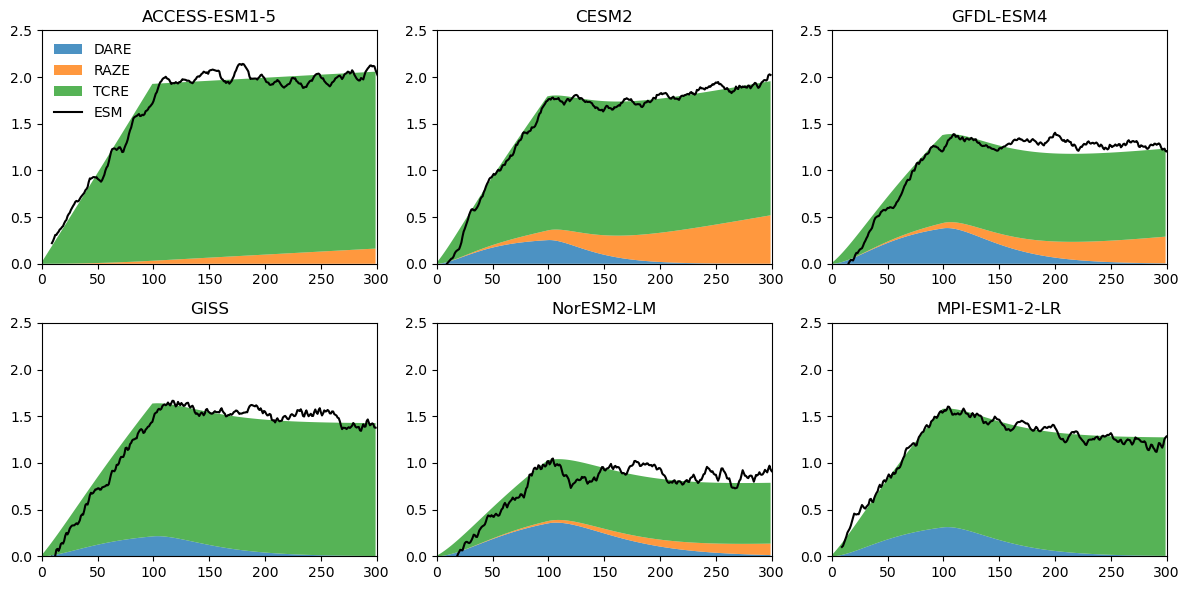

In [55]:
l=300

fig, axs = plt.subplots(2, 3,figsize=[12,6])
axs=axs.flatten()

for i,m in enumerate(mdls):
    tsampx=ed[m]['flat10-zec'].tas-ed[m]['flat10-zec'].tas[0]
    tsamp=tsampx.values

    Ecnz=ed[m]['flat10-zec'].fco2fos[:len(tsamp)].values

    tmp0=opt[i].x.copy()
    tmp0[2]=0
    tmp0[3]=0
    tmp1=opt[i].x.copy()
    tmp1[0]=0
    tmp1[3]=0
    tmp2=opt[i].x.copy()
    tmp2[0]=0
    tmp2[2]=0
    tmps=np.vstack([implsfun(tmp0,tsamp,Ecnz)[:l],implsfun(tmp2,tsamp,Ecnz)[:l],implsfun(tmp1,tsamp,Ecnz)[:l]])
    p1=axs[i].stackplot(np.arange(0,l),tmps,alpha=.8)
    
    p2=axs[i].plot(tsampx.rolling(year=10).mean(),'k')
    axs[i].set_title(m)
    axs[i].set_xlim(0,300)
    axs[i].set_ylim(0,2.5)

axs[0].legend([p1[0],p1[1],p1[2],p2[0]] ,['DARE','RAZE','TCRE','ESM'], frameon=False, loc="upper left")

plt.tight_layout()    